# <CENTER>TASK 2<br>Experimentation and uplift testing

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading data
qvi_data=pd.read_csv("QVI_data.csv");
qvi_data.head(2)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream


In [3]:
qvi_data['DATE']=pd.to_datetime(qvi_data['DATE'])

In [4]:
qvi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.2+ MB


In [5]:
qvi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.2+ MB


In [6]:

qvi_data["DATE"] = pd.to_datetime(qvi_data["DATE"], format="%Y-%m-%d")

# Add a new 'MONTH_ID' column in the data with the format yyyymm
qvi_data["YEARMONTH"] = qvi_data["DATE"].dt.strftime("%Y%m").astype("int")
qvi_data["YEARMONTH"].head()

0    201810
1    201809
2    201903
3    201903
4    201811
Name: YEARMONTH, dtype: int32

In [7]:
qvi_data

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEARMONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream,201812
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,201810
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget,201810
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget,201810


Now, let's establish the measurement calculations for our analysis. For each store and month, we will compute the following metrics: total sales, the count of customers, transactions per customer, chips per customer, and the average price per unit.

In [8]:
qvi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
 12  YEARMONTH         264834 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(6), objec

In [9]:
# Monthly total sales
TOT_SALES = qvi_data.groupby(["STORE_NBR","YEARMONTH"])["TOT_SALES"].sum()

# Monthly customer counts
CUS_COUNTS = qvi_data.groupby(["STORE_NBR","YEARMONTH"])["LYLTY_CARD_NBR"].nunique()

# Monthly transactions per customer
TXN_CUS = qvi_data.groupby(["STORE_NBR","YEARMONTH"])["TXN_ID"].nunique()/CUS_COUNTS

# Monthly chips per customer
CHIP_CUS = qvi_data.groupby(["STORE_NBR","YEARMONTH"])["PROD_QTY"].sum()/CUS_COUNTS

# Monthly average price per unit
AVG_PRICE_CHIP = TOT_SALES/qvi_data.groupby(["STORE_NBR","YEARMONTH"])["PROD_QTY"].sum()



In [10]:
# Combining metrics together
metrics = pd.concat([TOT_SALES, CUS_COUNTS, TXN_CUS, CHIP_CUS, AVG_PRICE_CHIP],axis=1)                                 
metrics.columns = ["TOT_SALES", "CUS_COUNTS", "TXN/CUS", "CHIP/CUS", "AVGPRICE/CHIP"]
metrics = metrics.reset_index()
metrics

,STORE_NBR,YEARMONTH,TOT_SALES,CUS_COUNTS,TXN/CUS,CHIP/CUS,AVGPRICE/CHIP
0,1,201807,206.9,49,1.061224,1.265306,3.337097
1,1,201808,176.1,42,1.023810,1.285714,3.261111
2,1,201809,278.8,59,1.050847,1.271186,3.717333
3,1,201810,188.1,44,1.022727,1.318182,3.243103
4,1,201811,192.6,46,1.021739,1.239130,3.378947
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,2.022222,4.346154
3165,272,201903,442.3,50,1.060000,2.020000,4.379208
3166,272,201904,445.1,54,1.018519,1.944444,4.239048
3167,272,201905,314.6,34,1.176471,2.088235,4.430986


In [11]:
# stores with 12 month observation
obs = metrics["STORE_NBR"].value_counts()
index = obs[obs == 12].index
FullObs = metrics[metrics["STORE_NBR"].isin(index)]

# Filter to the pre-trial period (201807 - 201901)
preTrial = FullObs[FullObs["YEARMONTH"] < 201902]
preTrial.head(8)

,STORE_NBR,YEARMONTH,TOT_SALES,CUS_COUNTS,TXN/CUS,CHIP/CUS,AVGPRICE/CHIP
0,1,201807,206.9,49,1.061224,1.265306,3.337097
1,1,201808,176.1,42,1.023810,1.285714,3.261111
2,1,201809,278.8,59,1.050847,1.271186,3.717333
3,1,201810,188.1,44,1.022727,1.318182,3.243103
4,1,201811,192.6,46,1.021739,1.239130,3.378947
5,1,201812,189.6,42,1.119048,1.357143,3.326316
6,1,201901,154.8,35,1.028571,1.200000,3.685714
12,2,201807,150.8,39,1.051282,1.179487,3.278261


Next, we should develop a method to rank the similarity of each potential control store to the trial store. This can be achieved by calculating the correlation between the performance of each store and that of the trial store.

In [12]:
# creating function that calculates the correlation for a given metric while iterating through each control store

def calculateCorrelation(inputTable, metricCol, storeComparison):
    
    """'inputTable'      as a metric table with potential comparison stores 
       'metricCol'       as the store metric used to calculate correlation on 
       'storeComparison' as the store number of the trial store."""
    
    control_all = inputTable.loc[~inputTable["STORE_NBR"].isin([77,88,86])]
    trial = inputTable.loc[inputTable["STORE_NBR"] == storeComparison][metricCol].reset_index()
    calcCorrTable = pd.DataFrame(columns = ["Control_Store", "Trial_Store", "Corr"])
    
    for i in control_all["STORE_NBR"].unique():
        control = control_all[control_all["STORE_NBR"]==i][metricCol].reset_index()              
        correlation = control.corrwith(trial,axis=0)[1]
        calcCorrTable_i = pd.DataFrame({"Control_Store":i,"Trial_Store":storeComparison,"Corr":[correlation]}) 
        calcCorrTable = pd.concat([calcCorrTable, calcCorrTable_i])
     
    return calcCorrTable



In addition to using correlation, we can compute a standardized metric based on the absolute difference between the trial store's performance and the performance of each control store.

In [13]:

# Create a function to calculate a standardised magnitude distance for a measure, looping through each control store

def calculateMagnitudeDistance(inputTable, metricCol, storeComparison):
    
    """'inputTable'      as a metric table with potential comparison stores 
       'metricCol'       as the store metric used to calculate correlation on 
       'storeComparison' as the store number of the trial store."""
    
    control_all = inputTable.loc[~inputTable["STORE_NBR"].isin([77,86,88])]
    trial = inputTable.loc[inputTable["STORE_NBR"] == storeComparison].reset_index()[metricCol]
    calcDistTable = pd.DataFrame(columns=["Control_Store", "Trial_Store", "Magnitude"])
    
    for i in control_all["STORE_NBR"].unique():
        control = control_all[control_all["STORE_NBR"]==i].reset_index()[metricCol]
        diff = abs(trial - control)
        
        # Standardise the magnitude distance so that the measure ranges from 0 to 1
        s_diff = np.mean(1-((diff-min(diff))/(max(diff)-min(diff))))
        calcDistTable_i = pd.DataFrame({"Control_Store":i,"Trial_Store":[storeComparison],"Magnitude": s_diff})
        calcDistTable = pd.concat([calcDistTable, calcDistTable_i])
    return calcDistTable
    
   

Now, let's apply these functions to identify the control stores. We will determine control stores based on the similarity of monthly total sales (in dollar amounts) and monthly number of customers to the trial store. To do this, we'll use the functions to obtain four scores: two for total sales and two for total customers. These scores will help us select appropriate control stores.

# Store 77

Finding stores correlated to store 77

In [14]:
# Calculate correlations with respect to store 77, considering both total sales and the number of customers.
# total sales - corr
corr_totsale_77 = calculateCorrelation(preTrial,"TOT_SALES",77)

# total sales - magnitude distance
magnitude_totsale_77 = calculateMagnitudeDistance(preTrial,"TOT_SALES",77) 

# number of customers - corr
corr_cuscount_77 = calculateCorrelation(preTrial,"CUS_COUNTS",77)

# number of customers - magnitude distance
magnitude_cuscount_77 = calculateMagnitudeDistance(preTrial,"CUS_COUNTS",77) 



We should aggregate all the scores computed using our functions to generate a composite score for ranking purposes. To create this composite score, we can calculate a simple average of the correlation and magnitude scores for each driver. If we want to emphasize the similarity in the trend of the drivers, we can assign a higher weight to the correlation score (setting corr_weight to a value greater than 0.5). Conversely, if the absolute size of the drivers is more critical, we can reduce the weight of the correlation score.

In [15]:

# Merging the correlations table with the magnitude table - Total sales
totsale_77_merge = pd.concat([corr_totsale_77,magnitude_totsale_77["Magnitude"]],axis=1)

# Calculate a combined score - Total sales
corr_weight_a = 0.5
totsale_77_merge["score_totsales"] = corr_weight_a * totsale_77_merge["Corr"] + (1-corr_weight_a) * totsale_77_merge["Magnitude"]
totsale_77_merge

,Control_Store,Trial_Store,Corr,Magnitude,score_totsales
0,1,77,0.075218,0.408163,0.241691
0,2,77,-0.263079,0.590119,0.163520
0,3,77,0.806644,0.522914,0.664779
0,4,77,-0.263300,0.644934,0.190817
0,5,77,-0.110652,0.516320,0.202834
...,...,...,...,...,...
0,268,77,0.344757,0.429787,0.387272
0,269,77,-0.315730,0.559099,0.121684
0,270,77,0.315430,0.591547,0.453489
0,271,77,0.355487,0.341091,0.348289


In [16]:
# Merging the correlations table with the magnitude table - number of Customers
cuscount_77_merge = pd.concat([corr_cuscount_77,magnitude_cuscount_77["Magnitude"]],axis=1)

# Calculate a combined score - number of Customers
corr_weight_b = 0.5
cuscount_77_merge["score_cuscount"] = corr_weight_b * cuscount_77_merge["Corr"] + (1-corr_weight_b) * cuscount_77_merge["Magnitude"]
cuscount_77_merge

,Control_Store,Trial_Store,Corr,Magnitude,score_cuscount
0,1,77,0.322168,0.663866,0.493017
0,2,77,-0.572051,0.471429,-0.050311
0,3,77,0.834207,0.489796,0.662002
0,4,77,-0.295639,0.498258,0.101310
0,5,77,0.370659,0.512605,0.441632
...,...,...,...,...,...
0,268,77,0.369517,0.571429,0.470473
0,269,77,-0.474293,0.484472,0.005090
0,270,77,-0.131259,0.536680,0.202710
0,271,77,0.019629,0.328571,0.174100


combining the total sales and number of customers with a simple average

In [17]:
# Merging the score tables
finalScore_77 = pd.concat([totsale_77_merge[["Control_Store", "Trial_Store", "score_totsales"]],cuscount_77_merge["score_cuscount"]],axis=1)

# Calculate a final score 
corr_weight_c = 0.5
finalScore_77["finalScore"] = corr_weight_c * finalScore_77["score_totsales"] + (1-corr_weight_c) * finalScore_77["score_cuscount"]
finalScore_77

,Control_Store,Trial_Store,score_totsales,score_cuscount,finalScore
0,1,77,0.241691,0.493017,0.367354
0,2,77,0.163520,-0.050311,0.056604
0,3,77,0.664779,0.662002,0.663390
0,4,77,0.190817,0.101310,0.146064
0,5,77,0.202834,0.441632,0.322233
...,...,...,...,...,...
0,268,77,0.387272,0.470473,0.428872
0,269,77,0.121684,0.005090,0.063387
0,270,77,0.453489,0.202710,0.328100
0,271,77,0.348289,0.174100,0.261195


The store with the highest composite score is chosen as the control store because it exhibits the highest similarity to the trial store.

In [18]:
# Finding control store with highest final score
finalScore_77.sort_values(by="finalScore",ascending=False).head()

,Control_Store,Trial_Store,score_totsales,score_cuscount,finalScore
0,233,77,0.697290,0.816607,0.756949
0,71,77,0.789497,0.663123,0.726310
0,84,77,0.656972,0.715000,0.685986
0,119,77,0.636046,0.729729,0.682887
0,115,77,0.708347,0.645155,0.676751


Now that we have found a control store (the store 233), let's check visually if the drivers are indeed similar in the period before the trial.
We'll look at total sales first

Text(0, 0.5, 'Total sales')

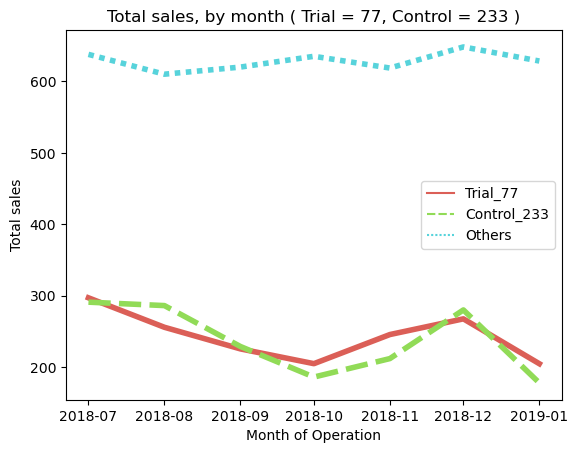

In [19]:
#Visualizing using lineplot
a = preTrial.set_index(["YEARMONTH","STORE_NBR"])["TOT_SALES"].unstack()
others_col = [i for i in a.columns if i not in [77, 233]]
a["others"]=a.loc[:,others_col].mean(axis=1)
trail_77_s = a.loc[:,([77,233,"others"])].reset_index()
trail_77_s["YEARMONTH"]= pd.to_datetime(trail_77_s["YEARMONTH"], format="%Y%m")
trail_77_s = trail_77_s.set_index(["YEARMONTH"])
trail_77_s.columns=["Trial_77","Control_233","Others"]
sns.lineplot(data=trail_77_s, linewidth=4,palette=sns.hls_palette(4))
plt.title("Total sales, by month ( Trial = 77, Control = 233 )")
plt.xlabel("Month of Operation")
plt.ylabel("Total sales")

Text(0, 0.5, 'Total sales')

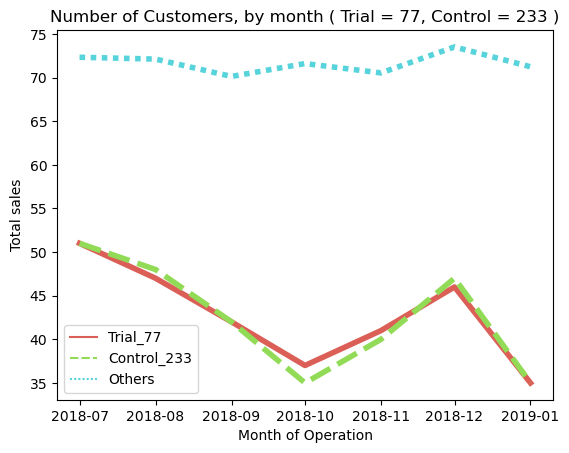

In [20]:
#Visualizing using lineplot
b = preTrial.set_index(["YEARMONTH","STORE_NBR"])["CUS_COUNTS"].unstack()
others_col = [i for i in b.columns if i not in [77, 233]]
b["others"]=b.loc[:,others_col].mean(axis=1)
trail_77_c = b.loc[:,([77,233,"others"])].reset_index()
trail_77_c["YEARMONTH"]= pd.to_datetime(trail_77_c["YEARMONTH"], format="%Y%m")
trail_77_c = trail_77_c.set_index(["YEARMONTH"])
trail_77_c.columns=["Trial_77","Control_233","Others"]
sns.lineplot(data=trail_77_c, linewidth=4,palette=sns.hls_palette(4))
plt.title("Number of Customers, by month ( Trial = 77, Control = 233 )")
plt.xlabel("Month of Operation")
plt.ylabel("Total sales")

# Store 88

In [21]:
# Calculate correlations with respect to store 88, considering both total sales and the number of customers.
# total sales - corr
corr_totsale_88 = calculateCorrelation(preTrial,"TOT_SALES",88)

# total sales - magnitude distance
magnitude_totsale_88 = calculateMagnitudeDistance(preTrial,"TOT_SALES",88) 

# number of customers - corr
corr_cuscount_88 = calculateCorrelation(preTrial,"CUS_COUNTS",88)

# number of customers - magnitude distance
magnitude_cuscount_88 = calculateMagnitudeDistance(preTrial,"CUS_COUNTS",88) 



In [22]:

# Merging the correlations table with the magnitude table - Total sales
totsale_88_merge = pd.concat([corr_totsale_88,magnitude_totsale_88["Magnitude"]],axis=1)

# Calculate a combined score - Total sales
corr_weight_a = 0.5
totsale_88_merge["score_totsales"] = corr_weight_a * totsale_88_merge["Corr"] + (1-corr_weight_a) * totsale_88_merge["Magnitude"]
totsale_88_merge

,Control_Store,Trial_Store,Corr,Magnitude,score_totsales
0,1,88,0.813636,0.548959,0.681297
0,2,88,-0.067927,0.541212,0.236643
0,3,88,-0.507847,0.458109,-0.024869
0,4,88,-0.745566,0.484447,-0.130559
0,5,88,0.190330,0.496409,0.343370
...,...,...,...,...,...
0,268,88,-0.021429,0.522847,0.250709
0,269,88,-0.172578,0.564856,0.196139
0,270,88,-0.723272,0.513329,-0.104971
0,271,88,-0.103037,0.429220,0.163091


In [23]:
# Merging the correlations table with the magnitude table - number of Customers
cuscount_88_merge = pd.concat([corr_cuscount_88,magnitude_cuscount_88["Magnitude"]],axis=1)

# Calculate a combined score - number of Customers
corr_weight_b = 0.5
cuscount_88_merge["score_cuscount"] = corr_weight_b * cuscount_88_merge["Corr"] + (1-corr_weight_b) * cuscount_88_merge["Magnitude"]
cuscount_88_merge

,Control_Store,Trial_Store,Corr,Magnitude,score_cuscount
0,1,88,0.305334,0.357143,0.331238
0,2,88,-0.452379,0.285714,-0.083332
0,3,88,0.522884,0.683673,0.603279
0,4,88,-0.361503,0.577922,0.108210
0,5,88,-0.025320,0.558442,0.266561
...,...,...,...,...,...
0,268,88,0.672672,0.630252,0.651462
0,269,88,-0.274781,0.360902,0.043061
0,270,88,-0.103032,0.367965,0.132467
0,271,88,-0.018831,0.655844,0.318507


In [24]:
# Merging the score tables
finalScore_88 = pd.concat([totsale_88_merge[["Control_Store", "Trial_Store", "score_totsales"]],cuscount_88_merge["score_cuscount"]],axis=1)

# Calculate a final score 
corr_weight_c = 0.5
finalScore_88["finalScore"] = corr_weight_c * finalScore_88["score_totsales"] + (1-corr_weight_c) * finalScore_88["score_cuscount"]
finalScore_88

,Control_Store,Trial_Store,score_totsales,score_cuscount,finalScore
0,1,88,0.681297,0.331238,0.506268
0,2,88,0.236643,-0.083332,0.076655
0,3,88,-0.024869,0.603279,0.289205
0,4,88,-0.130559,0.108210,-0.011175
0,5,88,0.343370,0.266561,0.304965
...,...,...,...,...,...
0,268,88,0.250709,0.651462,0.451086
0,269,88,0.196139,0.043061,0.119600
0,270,88,-0.104971,0.132467,0.013748
0,271,88,0.163091,0.318507,0.240799


In [25]:
# Finding control store with highest final score
finalScore_88.sort_values(by="finalScore",ascending=False).head()

,Control_Store,Trial_Store,score_totsales,score_cuscount,finalScore
0,178,88,0.650803,0.707828,0.679316
0,14,88,0.646064,0.685774,0.665919
0,134,88,0.775084,0.540154,0.657619
0,237,88,0.451974,0.777235,0.614604
0,187,88,0.616752,0.594560,0.605656


Upon further evaluation, it appears that store 178 might not be the best control store for store 88, despite having the highest control score. Consequently, we should consider exploring other stores listed in the previous step. Following this analysis, we have determined that store 237 is a more suitable control store for trial 88.

Text(0, 0.5, 'Total sales')

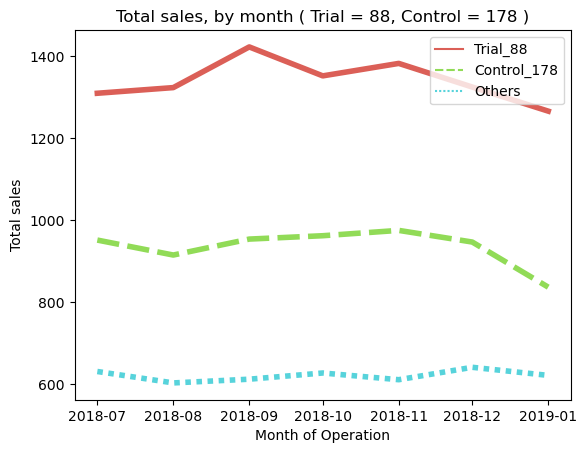

In [26]:
#Visualising using lineplot
a = preTrial.set_index(["YEARMONTH","STORE_NBR"])["TOT_SALES"].unstack()
others_col = [i for i in a.columns if i not in [88, 178]]
a["others"]=a.loc[:,others_col].mean(axis=1)
trail_88_s = a.loc[:,([88,178,"others"])].reset_index()
trail_88_s["YEARMONTH"]= pd.to_datetime(trail_88_s["YEARMONTH"], format="%Y%m")
trail_88_s = trail_88_s.set_index(["YEARMONTH"])
trail_88_s.columns=["Trial_88","Control_178","Others"]
sns.lineplot(data=trail_88_s, linewidth=4,palette=sns.hls_palette(4))
plt.title("Total sales, by month ( Trial = 88, Control = 178 )")
plt.xlabel("Month of Operation")
plt.ylabel("Total sales")

Text(0, 0.5, 'Total sales')

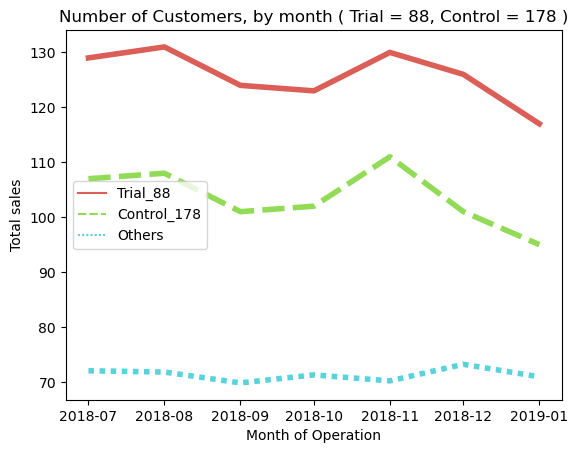

In [27]:
#Visualising using lineplot
b = preTrial.set_index(["YEARMONTH","STORE_NBR"])["CUS_COUNTS"].unstack()
others_col = [i for i in b.columns if i not in [88, 233]]
b["others"]=b.loc[:,others_col].mean(axis=1)
trail_88_c = b.loc[:,([88,178,"others"])].reset_index()
trail_88_c["YEARMONTH"]= pd.to_datetime(trail_88_c["YEARMONTH"], format="%Y%m")
trail_88_c = trail_88_c.set_index(["YEARMONTH"])
trail_88_c.columns=["Trial_88","Control_178","Others"]
sns.lineplot(data=trail_88_c, linewidth=4,palette=sns.hls_palette(4))
plt.title("Number of Customers, by month ( Trial = 88, Control = 178 )")
plt.xlabel("Month of Operation")
plt.ylabel("Total sales")

# Store 86

In [28]:
# Calculate correlations with respect to store 88, considering both total sales and the number of customers.
# total sales - corr
corr_totsale_86 = calculateCorrelation(preTrial,"TOT_SALES",86)

# total sales - magnitude distance
magnitude_totsale_86 = calculateMagnitudeDistance(preTrial,"TOT_SALES",86) 

# number of customers - corr
corr_cuscount_86 = calculateCorrelation(preTrial,"CUS_COUNTS",86)

# number of customers - magnitude distance
magnitude_cuscount_86 = calculateMagnitudeDistance(preTrial,"CUS_COUNTS",86) 



In [29]:

# Merging the correlations table with the magnitude table - Total sales
totsale_86_merge = pd.concat([corr_totsale_86,magnitude_totsale_86["Magnitude"]],axis=1)

# Calculate a combined score - Total sales
corr_weight_a = 0.5
totsale_86_merge["score_totsales"] = corr_weight_a * totsale_86_merge["Corr"] + (1-corr_weight_a) * totsale_86_merge["Magnitude"]
totsale_86_merge

,Control_Store,Trial_Store,Corr,Magnitude,score_totsales
0,1,86,0.445632,0.488334,0.466983
0,2,86,-0.403835,0.321131,-0.041352
0,3,86,-0.261284,0.507515,0.123116
0,4,86,-0.039035,0.635654,0.298309
0,5,86,0.235159,0.579835,0.407497
...,...,...,...,...,...
0,268,86,-0.452182,0.291930,-0.080126
0,269,86,0.697055,0.480267,0.588661
0,270,86,-0.730679,0.517014,-0.106832
0,271,86,0.527637,0.565665,0.546651


In [30]:
# Merging the correlations table with the magnitude table - number of Customers
cuscount_86_merge = pd.concat([corr_cuscount_86,magnitude_cuscount_86["Magnitude"]],axis=1)

# Calculate a combined score - number of Customers
corr_weight_b = 0.5
cuscount_86_merge["score_cuscount"] = corr_weight_b * cuscount_86_merge["Corr"] + (1-corr_weight_b) * cuscount_86_merge["Magnitude"]
cuscount_86_merge

,Control_Store,Trial_Store,Corr,Magnitude,score_cuscount
0,1,86,0.485831,0.510204,0.498018
0,2,86,-0.086161,0.428571,0.171205
0,3,86,-0.353786,0.563025,0.104620
0,4,86,-0.169608,0.537815,0.184103
0,5,86,-0.253229,0.714286,0.230528
...,...,...,...,...,...
0,268,86,-0.034273,0.566327,0.266027
0,269,86,-0.098587,0.581633,0.241523
0,270,86,-0.767267,0.650794,-0.058237
0,271,86,0.267393,0.598214,0.432804


In [31]:
# Merging the score tables
finalScore_86 = pd.concat([totsale_86_merge[["Control_Store", "Trial_Store", "score_totsales"]],cuscount_86_merge["score_cuscount"]],axis=1)

# Calculate a final score 
corr_weight_c = 0.5
finalScore_86["finalScore"] = corr_weight_c * finalScore_86["score_totsales"] + (1-corr_weight_c) * finalScore_86["score_cuscount"]
finalScore_86

,Control_Store,Trial_Store,score_totsales,score_cuscount,finalScore
0,1,86,0.466983,0.498018,0.482500
0,2,86,-0.041352,0.171205,0.064927
0,3,86,0.123116,0.104620,0.113868
0,4,86,0.298309,0.184103,0.241206
0,5,86,0.407497,0.230528,0.319013
...,...,...,...,...,...
0,268,86,-0.080126,0.266027,0.092950
0,269,86,0.588661,0.241523,0.415092
0,270,86,-0.106832,-0.058237,-0.082535
0,271,86,0.546651,0.432804,0.489727


In [32]:
# Finding control store with highest final score
finalScore_86.sort_values(by="finalScore",ascending=False).head()

,Control_Store,Trial_Store,score_totsales,score_cuscount,finalScore
0,155,86,0.808106,0.733343,0.770724
0,109,86,0.697120,0.742532,0.719826
0,114,86,0.631393,0.663384,0.647389
0,225,86,0.601841,0.684356,0.643099
0,138,86,0.593296,0.660565,0.626930


Text(0, 0.5, 'Total sales')

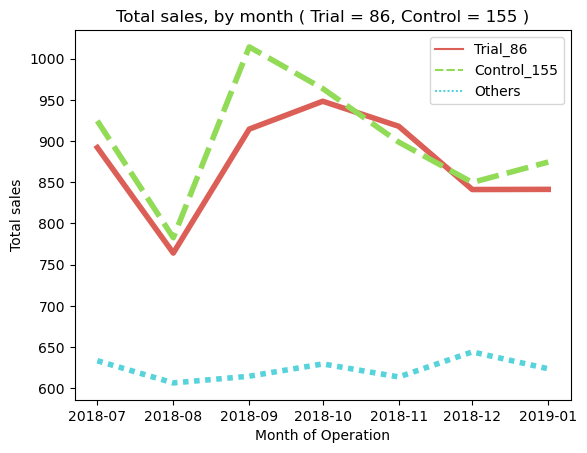

In [33]:
#Visualising using lineplot
a = preTrial.set_index(["YEARMONTH","STORE_NBR"])["TOT_SALES"].unstack()
others_col = [i for i in a.columns if i not in [86, 155]]
a["others"]=a.loc[:,others_col].mean(axis=1)
trail_86_s = a.loc[:,([86,155,"others"])].reset_index()
trail_86_s["YEARMONTH"]= pd.to_datetime(trail_86_s["YEARMONTH"], format="%Y%m")
trail_86_s = trail_86_s.set_index(["YEARMONTH"])
trail_86_s.columns=["Trial_86","Control_155","Others"]
sns.lineplot(data=trail_86_s, linewidth=4,palette=sns.hls_palette(4))
plt.title("Total sales, by month ( Trial = 86, Control = 155 )")
plt.xlabel("Month of Operation")
plt.ylabel("Total sales")

Text(0, 0.5, 'Total sales')

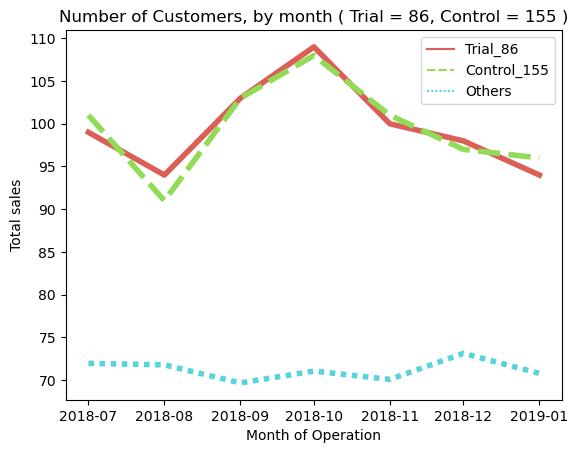

In [34]:
#Visualising using lineplot
b = preTrial.set_index(["YEARMONTH","STORE_NBR"])["CUS_COUNTS"].unstack()
others_col = [i for i in b.columns if i not in [86, 155]]
b["others"]=b.loc[:,others_col].mean(axis=1)
trail_86_c = b.loc[:,([86,155,"others"])].reset_index()
trail_86_c["YEARMONTH"]= pd.to_datetime(trail_86_c["YEARMONTH"], format="%Y%m")
trail_86_c = trail_86_c.set_index(["YEARMONTH"])
trail_86_c.columns=["Trial_86","Control_155","Others"]
sns.lineplot(data=trail_86_c, linewidth=4,palette=sns.hls_palette(4))
plt.title("Number of Customers, by month ( Trial = 86, Control = 155 )")
plt.xlabel("Month of Operation")
plt.ylabel("Total sales")

# Store 77

To evaluate if there has been an uplift in overall chip sales during the trial period (February 2019 to April 2019), we should begin by scaling the control store's sales to a level similar to the trial store's sales. This will help us account for any variations between the two stores that occurred outside of the trial period.

In [35]:
# Scaling control sales to store sales
scalingSales_77 = (preTrial[preTrial["STORE_NBR"] == 77]["TOT_SALES"].sum()) / (preTrial[preTrial["STORE_NBR"] == 233]["TOT_SALES"].sum())
scalingSales_77 

1.023617303289553

In [36]:
# Apply the scaling factor
scaledSales_77 = metrics[metrics["STORE_NBR"]== 233]
scaledSales_77["controlSales"] = scaledSales_77["TOT_SALES"] * scalingSales_77
scaledSales_77

,STORE_NBR,YEARMONTH,TOT_SALES,CUS_COUNTS,TXN/CUS,CHIP/CUS,AVGPRICE/CHIP,controlSales
2699,233,201807,290.7,51,1.058824,1.725490,3.303409,297.565550
2700,233,201808,285.9,48,1.041667,1.666667,3.573750,292.652187
2701,233,201809,228.6,42,1.071429,1.666667,3.265714,233.998916
2702,233,201810,185.7,35,1.028571,1.600000,3.316071,190.085733
2703,233,201811,211.6,40,1.025000,1.550000,3.412903,216.597421
2704,233,201812,279.8,47,1.063830,1.595745,3.730667,286.408121
2705,233,201901,177.5,35,1.000000,1.342857,3.776596,181.692071
2706,233,201902,244.0,45,1.044444,1.555556,3.485714,249.762622
2707,233,201903,199.1,40,1.025000,1.475000,3.374576,203.802205
2708,233,201904,158.6,30,1.066667,1.533333,3.447826,162.345704



With sales figures now adjusted and comparable between the control store and the trial store, we can proceed to calculate the percentage difference between the scaled control store sales and the trial store's sales during the trial period. This will help us assess the impact of any strategies or interventions on chip sales.

In [37]:
# Calculate the percentage difference between scaled control sales and trial sales
trial_77 = metrics[metrics["STORE_NBR"]== 77].reset_index(drop=True)
scaledSales_77 = scaledSales_77.reset_index(drop=True)
percentDiff_77_s = pd.concat([trial_77["YEARMONTH"],trial_77["TOT_SALES"],scaledSales_77["controlSales"]],axis=1)
percentDiff_77_s.columns=["YEARMONTH","trialSales","controlSales"]
percentDiff_77_s["percentDiff"]= (abs(percentDiff_77_s["trialSales"]-percentDiff_77_s["controlSales"]))/percentDiff_77_s["controlSales"]
percentDiff_77_s

,YEARMONTH,trialSales,controlSales,percentDiff
0,201807,296.8,297.565550,0.002573
1,201808,255.5,292.652187,0.126950
2,201809,225.2,233.998916,0.037602
3,201810,204.5,190.085733,0.075830
4,201811,245.3,216.597421,0.132516
5,201812,267.3,286.408121,0.066716
6,201901,204.4,181.692071,0.124980
7,201902,235.0,249.762622,0.059107
8,201903,278.5,203.802205,0.366521
9,201904,263.5,162.345704,0.623080



Now, we should determine whether the observed difference is statistically significant. Since our null hypothesis posits that the trial period is similar to the pre-trial period, we will calculate the standard deviation based on the scaled percentage differences observed during the pre-trial period. This will serve as a reference for assessing the significance of any observed changes during the trial period.

In [38]:
# Note: Here pre trial period is 8 months,so 8 - 1 = 7 degrees of freedom
dof = 7

# standard deviation of percentage difference in pre-trail period
std_77_s = percentDiff_77_s[percentDiff_77_s["YEARMONTH"]<201902]["percentDiff"].std()
std_77_s

0.04994076264142537

In [39]:
# Calculating t-values for the trial months. 
percentDiff_77_s["tValue"] = (percentDiff_77_s["percentDiff"]-0)/std_77_s
percentDiff_77_s

,YEARMONTH,trialSales,controlSales,percentDiff,tValue
0,201807,296.8,297.565550,0.002573,0.051515
1,201808,255.5,292.652187,0.126950,2.542011
2,201809,225.2,233.998916,0.037602,0.752940
3,201810,204.5,190.085733,0.075830,1.518406
4,201811,245.3,216.597421,0.132516,2.653459
5,201812,267.3,286.408121,0.066716,1.335911
6,201901,204.4,181.692071,0.124980,2.502571
7,201902,235.0,249.762622,0.059107,1.183534
8,201903,278.5,203.802205,0.366521,7.339116
9,201904,263.5,162.345704,0.623080,12.476373


In [40]:
# Critical value under 95% confidence & degree of freedom = 7
from scipy.stats import t
t.ppf(0.975,dof) # two-tail

2.3646242510102993

From our analysis, we can observe that the t-value significantly exceeds the 95th percentile value of the t-distribution for March and April. This indicates that the increase in sales at the trial store during these months is statistically greater than that of the control store.

To provide a more visual representation of the sales comparison, we'll create a plot that displays the sales of the control store, the sales of the trial store, and the 95th percentile value of sales from the control store. This visualization will help illustrate the significant increase in sales at the trial store during the relevant months.

In [41]:
# Create new variables Store_type, totSales and TransactionMonth in the data table 
# Create a new column "Store_Type"
metrics_77 = metrics
pastSales_77 = metrics_77
trial_store = 77
control_store = 233
store_type = []
for i in pastSales_77["STORE_NBR"]:
    if i == trial_store:
        store_type.append("Trial")
    elif i == control_store:
        store_type.append("Control")
    else:
        store_type.append("Other Stores")
pastSales_77["Store_type"] = store_type

# Create a new column 'TransactionMonth'
pastSales_77["TransactionMonth"] = pd.to_datetime(pastSales_77["YEARMONTH"], format = "%Y%m")

# select Trial and control store
pastSales_77 = pastSales_77.loc[pastSales_77["Store_type"].isin(["Control","Trial"])]
pastSales_77 = pastSales_77.loc[:,["TransactionMonth", "Store_type","TOT_SALES"]]
pastSales_77

,TransactionMonth,Store_type,TOT_SALES
880,2018-07-01,Trial,296.8
881,2018-08-01,Trial,255.5
882,2018-09-01,Trial,225.2
883,2018-10-01,Trial,204.5
884,2018-11-01,Trial,245.3
885,2018-12-01,Trial,267.3
886,2019-01-01,Trial,204.4
887,2019-02-01,Trial,235.0
888,2019-03-01,Trial,278.5
889,2019-04-01,Trial,263.5


In [42]:
# Control store 95th percentile
pastSales_Controls95_77 = pastSales_77[pastSales_77["Store_type"] == "Control"]
pastSales_Controls95_77["TOT_SALES"] = pastSales_Controls95_77["TOT_SALES"] * (1+(std_77_s*2))
pastSales_Controls95_77["Store_type"] = "Control 95th % confidence interval"
pastSales_Controls95_77 = pastSales_Controls95_77.loc[:,["TransactionMonth", "Store_type","TOT_SALES"]]
pastSales_Controls95_77.head()

,TransactionMonth,Store_type,TOT_SALES
2699,2018-07-01,Control 95th % confidence interval,319.735559
2700,2018-08-01,Control 95th % confidence interval,314.456128
2701,2018-09-01,Control 95th % confidence interval,251.432917
2702,2018-10-01,Control 95th % confidence interval,204.247999
2703,2018-11-01,Control 95th % confidence interval,232.734931


In [43]:
# Control store 5th percentile
pastSales_Controls5_77 = pastSales_77[pastSales_77["Store_type"] == "Control"]
pastSales_Controls5_77["TOT_SALES"] = pastSales_Controls95_77["TOT_SALES"] * (1-(std_77_s*2))
pastSales_Controls5_77["Store_type"] = "Control 5th % confidence interval"
pastSales_Controls5_77 = pastSales_Controls5_77.loc[:,["TransactionMonth", "Store_type","TOT_SALES"]]
pastSales_Controls5_77.head()

,TransactionMonth,Store_type,TOT_SALES
2699,2018-07-01,Control 5th % confidence interval,287.799884
2700,2018-08-01,Control 5th % confidence interval,283.047770
2701,2018-09-01,Control 5th % confidence interval,226.319413
2702,2018-10-01,Control 5th % confidence interval,183.847398
2703,2018-11-01,Control 5th % confidence interval,209.489011


In [44]:
# Merge 3 tables above together
trialAssessment_77_s = pd.concat([pastSales_77, pastSales_Controls95_77, pastSales_Controls5_77])
trialAssessment_77_s

,TransactionMonth,Store_type,TOT_SALES
880,2018-07-01,Trial,296.800000
881,2018-08-01,Trial,255.500000
882,2018-09-01,Trial,225.200000
883,2018-10-01,Trial,204.500000
884,2018-11-01,Trial,245.300000
885,2018-12-01,Trial,267.300000
886,2019-01-01,Trial,204.400000
887,2019-02-01,Trial,235.000000
888,2019-03-01,Trial,278.500000
889,2019-04-01,Trial,263.500000


In [45]:
# Plotting these in barplot
bar_77_sale = trialAssessment_77_s
bar_77_sale["TransactionMonth"] = bar_77_sale["TransactionMonth"].dt.strftime("%Y-%m").astype("str")
bar_77_sale = bar_77_sale.set_index("TransactionMonth")
bar_77_sale = bar_77_sale.iloc[:24,:]
bar_77_sale

,Store_type,TOT_SALES
TransactionMonth,,
2018-07,Trial,296.8
2018-08,Trial,255.5
2018-09,Trial,225.2
2018-10,Trial,204.5
2018-11,Trial,245.3
2018-12,Trial,267.3
2019-01,Trial,204.4
2019-02,Trial,235.0
2019-03,Trial,278.5


In [46]:
# Dataset for lineplot
line_77_sale = trialAssessment_77_s.set_index(["TransactionMonth","Store_type"])["TOT_SALES"].unstack()
line_77_sale = line_77_sale.iloc[:,[1,2]]
line_77_sale

Store_type,Control 5th % confidence interval,Control 95th % confidence interval
TransactionMonth,,
2018-07,287.799884,319.735559
2018-08,283.047770,314.456128
2018-09,226.319413,251.432917
2018-10,183.847398,204.247999
2018-11,209.489011,232.734931
2018-12,277.008626,307.746851
2019-01,175.729203,195.228971
2019-02,241.565778,268.371092
2019-03,197.113715,218.986412


Text(0.5, 0, 'Month of Operation')

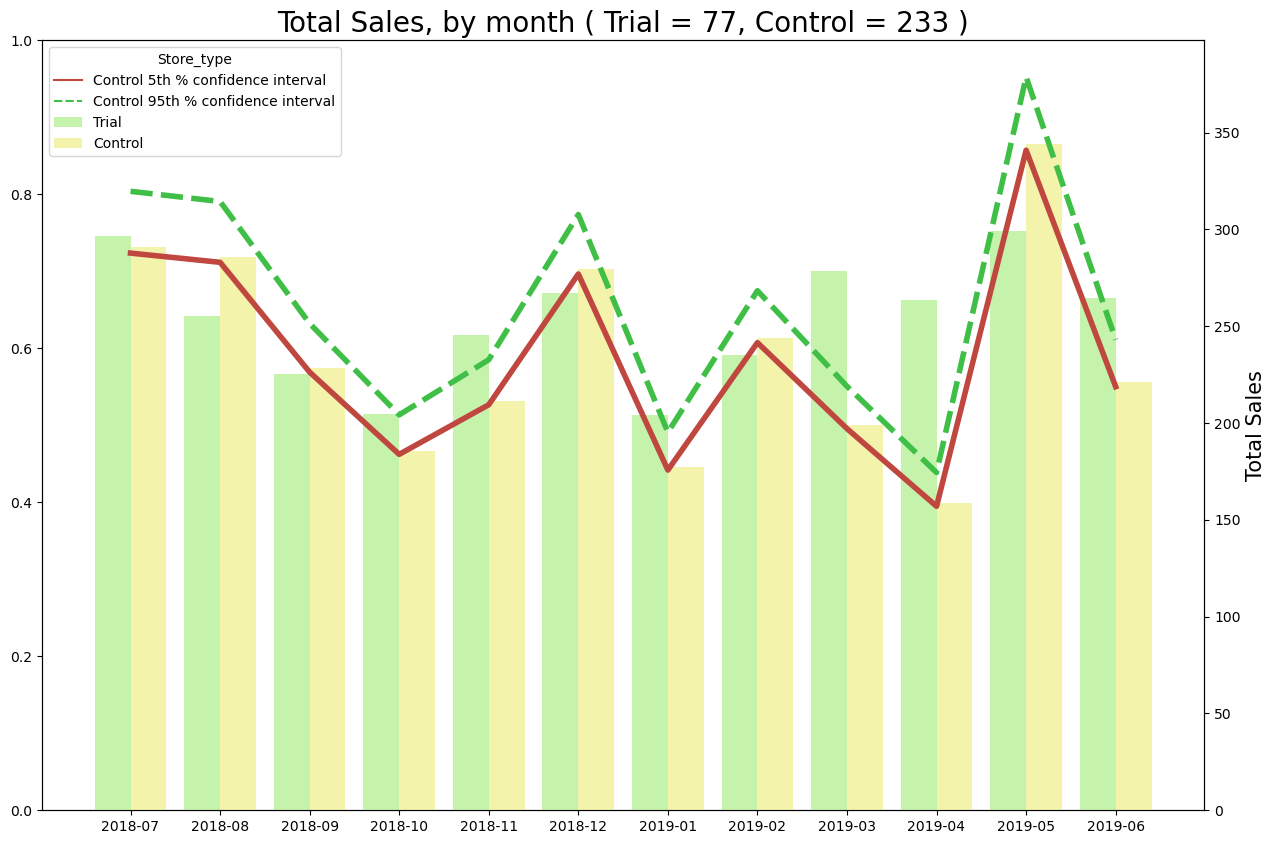

In [47]:
# Plotting
fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
ax2 = ax1.twinx()
ax1 = sns.barplot(x=bar_77_sale.index, y=bar_77_sale["TOT_SALES"], hue=bar_77_sale["Store_type"], data=bar_77_sale,
                 palette=["#C3FFA0", "#FFFFA0"])
ax2 = sns.lineplot(data=line_77_sale, linewidth=4, palette=sns.hls_palette(3, l=.5, s=.5))
plt.title("Total Sales, by month ( Trial = 77, Control = 233 )",fontsize=20)
plt.ylabel("Total Sales", fontsize=15)
plt.xlabel("Month of Operation",fontsize=15)


Based on the results, it's evident that the performance of the trial store 77 is significantly different from its control store during the trial period. This is evident because the trial store's performance falls far outside the 5% to 95% confidence interval of the control store in two out of the three trial months.

# Store 88

In [48]:
# Scaling control sales to store sales
scalingSales_88 = (preTrial[preTrial["STORE_NBR"] == 88]["TOT_SALES"].sum()) / (preTrial[preTrial["STORE_NBR"] == 237]["TOT_SALES"].sum())
scalingSales_88 

1.001558330664959

In [49]:
# Apply the scaling factor
scaledSales_88= metrics[metrics["STORE_NBR"]== 237]
scaledSales_88["controlSales"] = scaledSales_88["TOT_SALES"] * scalingSales_88
scaledSales_88

,STORE_NBR,YEARMONTH,TOT_SALES,CUS_COUNTS,TXN/CUS,CHIP/CUS,AVGPRICE/CHIP,Store_type,TransactionMonth,controlSales
2747,237,201807,1448.4,128,1.265625,2.531250,4.470370,Other Stores,2018-07-01,1450.657086
2748,237,201808,1367.8,135,1.222222,2.318519,4.369968,Other Stores,2018-08-01,1369.931485
2749,237,201809,1322.2,126,1.182540,2.373016,4.422074,Other Stores,2018-09-01,1324.260425
2750,237,201810,1348.3,123,1.195122,2.430894,4.509365,Other Stores,2018-10-01,1350.401097
2751,237,201811,1397.6,132,1.219697,2.424242,4.367500,Other Stores,2018-11-01,1399.777923
2752,237,201812,1265.0,124,1.161290,2.330645,4.377163,Other Stores,2018-12-01,1266.971288
2753,237,201901,1219.7,117,1.188034,2.367521,4.403249,Other Stores,2019-01-01,1221.600696
2754,237,201902,1404.8,126,1.246032,2.492063,4.473885,Other Stores,2019-02-01,1406.989143
2755,237,201903,1208.2,119,1.126050,2.302521,4.409489,Other Stores,2019-03-01,1210.082775
2756,237,201904,1204.6,120,1.125000,2.266667,4.428676,Other Stores,2019-04-01,1206.477165


In [50]:
# Calculate the percentage difference between scaled control sales and trial sales
trial_88 = metrics[metrics["STORE_NBR"]== 88].reset_index(drop=True)
scaledSales_88 = scaledSales_88.reset_index(drop=True)
percentDiff_88_s = pd.concat([trial_88["YEARMONTH"],trial_88["TOT_SALES"],scaledSales_88["controlSales"]],axis=1)
percentDiff_88_s.columns=["YEARMONTH","trialSales","controlSales"]
percentDiff_88_s["percentDiff"]= (abs(percentDiff_88_s["trialSales"]-percentDiff_88_s["controlSales"]))/percentDiff_88_s["controlSales"]
percentDiff_88_s

,YEARMONTH,trialSales,controlSales,percentDiff
0,201807,1310.00,1450.657086,0.096961
1,201808,1323.80,1369.931485,0.033674
2,201809,1423.00,1324.260425,0.074562
3,201810,1352.40,1350.401097,0.001480
4,201811,1382.80,1399.777923,0.012129
5,201812,1325.20,1266.971288,0.045959
6,201901,1266.40,1221.600696,0.036673
7,201902,1370.20,1406.989143,0.026147
8,201903,1477.20,1210.082775,0.220743
9,201904,1439.40,1206.477165,0.193060


In [51]:
# Note: Here pre trial period is 8 months,so 8 - 1 = 7 degrees of freedom
dof = 7

# standard deviation of percentage difference in pre-trail period
std_88_s = percentDiff_88_s[percentDiff_88_s["YEARMONTH"]<201902]["percentDiff"].std()
std_88_s

0.0334678673030788

In [52]:
# Calculating t-values for the trial months. 
percentDiff_88_s["tValue"] = (percentDiff_88_s["percentDiff"]-0)/std_88_s
percentDiff_88_s

,YEARMONTH,trialSales,controlSales,percentDiff,tValue
0,201807,1310.00,1450.657086,0.096961,2.897136
1,201808,1323.80,1369.931485,0.033674,1.006168
2,201809,1423.00,1324.260425,0.074562,2.227870
3,201810,1352.40,1350.401097,0.001480,0.044228
4,201811,1382.80,1399.777923,0.012129,0.362408
5,201812,1325.20,1266.971288,0.045959,1.373227
6,201901,1266.40,1221.600696,0.036673,1.095756
7,201902,1370.20,1406.989143,0.026147,0.781270
8,201903,1477.20,1210.082775,0.220743,6.595668
9,201904,1439.40,1206.477165,0.193060,5.768527


In [53]:
# Create new variables Store_type, totSales and TransactionMonth in the data table 
# Create a new column "Store_Type"
metrics_88 = metrics
pastSales_88 = metrics_88
trial_store = 88
control_store = 237
store_type = []
for i in pastSales_88["STORE_NBR"]:
    if i == trial_store:
        store_type.append("Trial")
    elif i == control_store:
        store_type.append("Control")
    else:
        store_type.append("Other Stores")
pastSales_88["Store_type"] = store_type

# Create a new column 'TransactionMonth'
pastSales_88["TransactionMonth"] = pd.to_datetime(pastSales_88["YEARMONTH"], format = "%Y%m")

# select Trial and control store
pastSales_88 = pastSales_88.loc[pastSales_88["Store_type"].isin(["Control","Trial"])]
pastSales_88 = pastSales_88.loc[:,["TransactionMonth", "Store_type","TOT_SALES"]]
pastSales_88

,TransactionMonth,Store_type,TOT_SALES
1001,2018-07-01,Trial,1310.00
1002,2018-08-01,Trial,1323.80
1003,2018-09-01,Trial,1423.00
1004,2018-10-01,Trial,1352.40
1005,2018-11-01,Trial,1382.80
1006,2018-12-01,Trial,1325.20
1007,2019-01-01,Trial,1266.40
1008,2019-02-01,Trial,1370.20
1009,2019-03-01,Trial,1477.20
1010,2019-04-01,Trial,1439.40


In [54]:
# Control store 95th percentile
pastSales_Controls95_88= pastSales_88[pastSales_88["Store_type"] == "Control"]
pastSales_Controls95_88["TOT_SALES"] = pastSales_Controls95_88["TOT_SALES"] * (1+(std_88_s*2))
pastSales_Controls95_88["Store_type"] = "Control 95th % confidence interval"
pastSales_Controls95_88 = pastSales_Controls95_88.loc[:,["TransactionMonth", "Store_type","TOT_SALES"]]
pastSales_Controls95_88.head()

,TransactionMonth,Store_type,TOT_SALES
2747,2018-07-01,Control 95th % confidence interval,1545.349718
2748,2018-08-01,Control 95th % confidence interval,1459.354698
2749,2018-09-01,Control 95th % confidence interval,1410.702428
2750,2018-10-01,Control 95th % confidence interval,1438.549451
2751,2018-11-01,Control 95th % confidence interval,1491.149383


In [55]:
# Control store 5th percentile
pastSales_Controls5_88 = pastSales_88[pastSales_88["Store_type"] == "Control"]
pastSales_Controls5_88["TOT_SALES"] = pastSales_Controls95_88["TOT_SALES"] * (1-(std_88_s*2))
pastSales_Controls5_88["Store_type"] = "Control 5th % confidence interval"
pastSales_Controls5_88 = pastSales_Controls5_88.loc[:,["TransactionMonth", "Store_type","TOT_SALES"]]
pastSales_Controls5_88.head()

,TransactionMonth,Store_type,TOT_SALES
2747,2018-07-01,Control 5th % confidence interval,1441.910599
2748,2018-08-01,Control 5th % confidence interval,1361.671719
2749,2018-09-01,Control 5th % confidence interval,1316.276025
2750,2018-10-01,Control 5th % confidence interval,1342.259087
2751,2018-11-01,Control 5th % confidence interval,1391.338203


In [56]:
# Merge 3 tables above together
trialAssessment_88_s = pd.concat([pastSales_88, pastSales_Controls95_88, pastSales_Controls5_88])
trialAssessment_88_s

,TransactionMonth,Store_type,TOT_SALES
1001,2018-07-01,Trial,1310.000000
1002,2018-08-01,Trial,1323.800000
1003,2018-09-01,Trial,1423.000000
1004,2018-10-01,Trial,1352.400000
1005,2018-11-01,Trial,1382.800000
1006,2018-12-01,Trial,1325.200000
1007,2019-01-01,Trial,1266.400000
1008,2019-02-01,Trial,1370.200000
1009,2019-03-01,Trial,1477.200000
1010,2019-04-01,Trial,1439.400000


In [57]:
# Plotting these in barplot
bar_88_sale = trialAssessment_88_s
bar_88_sale["TransactionMonth"] = bar_88_sale["TransactionMonth"].dt.strftime("%Y-%m").astype("str")
bar_88_sale = bar_88_sale.set_index("TransactionMonth")
bar_88_sale = bar_88_sale.iloc[:24,:]
bar_88_sale

,Store_type,TOT_SALES
TransactionMonth,,
2018-07,Trial,1310.00
2018-08,Trial,1323.80
2018-09,Trial,1423.00
2018-10,Trial,1352.40
2018-11,Trial,1382.80
2018-12,Trial,1325.20
2019-01,Trial,1266.40
2019-02,Trial,1370.20
2019-03,Trial,1477.20


In [58]:
# Dataset for lineplot
line_88_sale = trialAssessment_88_s.set_index(["TransactionMonth","Store_type"])["TOT_SALES"].unstack()
line_88_sale = line_88_sale.iloc[:,[1,2]]
line_88_sale

Store_type,Control 5th % confidence interval,Control 95th % confidence interval
TransactionMonth,,
2018-07,1441.910599,1545.349718
2018-08,1361.671719,1459.354698
2018-09,1316.276025,1410.702428
2018-10,1342.259087,1438.549451
2018-11,1391.338203,1491.149383
2018-12,1259.332303,1349.673704
2019-01,1214.235265,1301.341515
2019-02,1398.505945,1498.831320
2019-03,1202.786790,1289.071755


Text(0.5, 0, 'Month of Operation')

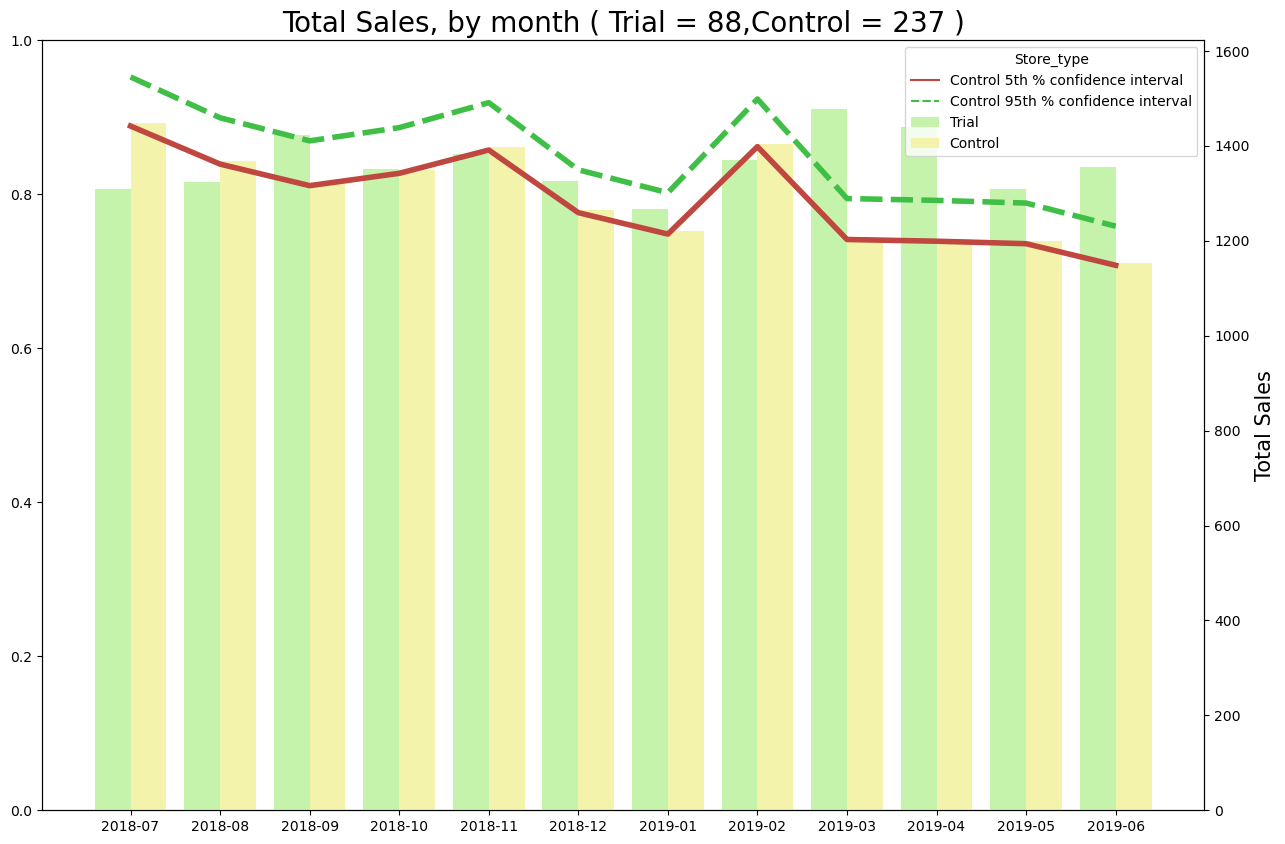

In [59]:
# Plotting
fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
ax2 = ax1.twinx()
ax1 = sns.barplot(x=bar_88_sale.index, y=bar_88_sale["TOT_SALES"], hue=bar_88_sale["Store_type"], data=bar_88_sale,
                 palette=["#C3FFA0", "#FFFFA0"])
ax2 = sns.lineplot(data=line_88_sale, linewidth=4, palette=sns.hls_palette(3,l=.5, s=.5))
plt.title("Total Sales, by month ( Trial = 88,Control = 237 )",fontsize=20)
plt.ylabel("Total Sales", fontsize=15)
plt.xlabel("Month of Operation",fontsize=15)


The analysis indicates that the trial conducted at store 88 significantly differs from its control store during the trial period. Specifically, the performance of the trial store falls outside the 5% to 95% confidence interval of the control store in two out of the three trial months.

# Store 86

In [60]:
# Scaling control sales to store sales
scalingSales_86 = (preTrial[preTrial["STORE_NBR"] == 86]["TOT_SALES"].sum()) / (preTrial[preTrial["STORE_NBR"] == 155]["TOT_SALES"].sum())
scalingSales_86 

0.9700651481287743

In [61]:
# Apply the scaling factor
scaledSales_86 = metrics[metrics["STORE_NBR"]== 155]
scaledSales_86["controlSales"] = scaledSales_86["TOT_SALES"] * scalingSales_86
scaledSales_86

,STORE_NBR,YEARMONTH,TOT_SALES,CUS_COUNTS,TXN/CUS,CHIP/CUS,AVGPRICE/CHIP,Store_type,TransactionMonth,controlSales
1793,155,201807,924.60,101,1.217822,2.475248,3.698400,Other Stores,2018-07-01,896.922236
1794,155,201808,782.70,91,1.307692,2.516484,3.417904,Other Stores,2018-08-01,759.269991
1795,155,201809,1014.40,103,1.398058,2.815534,3.497931,Other Stores,2018-09-01,984.034086
1796,155,201810,963.80,108,1.259259,2.518519,3.543382,Other Stores,2018-10-01,934.948790
1797,155,201811,898.80,101,1.316832,2.673267,3.328889,Other Stores,2018-11-01,871.894555
1798,155,201812,849.80,97,1.237113,2.494845,3.511570,Other Stores,2018-12-01,824.361363
1799,155,201901,874.60,96,1.302083,2.625000,3.470635,Other Stores,2019-01-01,848.418979
1800,155,201902,891.20,95,1.315789,2.673684,3.508661,Other Stores,2019-02-01,864.522060
1801,155,201903,804.40,94,1.255319,2.553191,3.351667,Other Stores,2019-03-01,780.320405
1802,155,201904,844.60,99,1.212121,2.444444,3.490083,Other Stores,2019-04-01,819.317024


In [62]:
# Calculate the percentage difference between scaled control sales and trial sales
trial_86 = metrics[metrics["STORE_NBR"]== 86].reset_index(drop=True)
scaledSales_86 = scaledSales_86.reset_index(drop=True)
percentDiff_86_s = pd.concat([trial_86["YEARMONTH"],trial_86["TOT_SALES"],scaledSales_86["controlSales"]],axis=1)
percentDiff_86_s.columns=["YEARMONTH","trialSales","controlSales"]
percentDiff_86_s["percentDiff"]= (abs(percentDiff_86_s["trialSales"]-percentDiff_86_s["controlSales"]))/percentDiff_86_s["controlSales"]
percentDiff_86_s

,YEARMONTH,trialSales,controlSales,percentDiff
0,201807,892.20,896.922236,0.005265
1,201808,764.05,759.269991,0.006296
2,201809,914.60,984.034086,0.070561
3,201810,948.40,934.948790,0.014387
4,201811,918.00,871.894555,0.052880
5,201812,841.20,824.361363,0.020426
6,201901,841.40,848.418979,0.008273
7,201902,913.20,864.522060,0.056306
8,201903,1026.80,780.320405,0.315870
9,201904,848.20,819.317024,0.035253


In [63]:
# Note: Here pre trial period is 8 months,so 8 - 1 = 7 degrees of freedom
dof = 7

# standard deviation of percentage difference in pre-trail period
std_86_s = percentDiff_86_s[percentDiff_86_s["YEARMONTH"]<201902]["percentDiff"].std()
std_86_s

0.025833952854772368

In [64]:
# Calculating t-values for the trial months. 
percentDiff_86_s["tValue"] = (percentDiff_86_s["percentDiff"]-0)/std_86_s
percentDiff_86_s

,YEARMONTH,trialSales,controlSales,percentDiff,tValue
0,201807,892.20,896.922236,0.005265,0.203799
1,201808,764.05,759.269991,0.006296,0.243692
2,201809,914.60,984.034086,0.070561,2.731315
3,201810,948.40,934.948790,0.014387,0.556907
4,201811,918.00,871.894555,0.052880,2.046904
5,201812,841.20,824.361363,0.020426,0.790676
6,201901,841.40,848.418979,0.008273,0.320238
7,201902,913.20,864.522060,0.056306,2.179542
8,201903,1026.80,780.320405,0.315870,12.226922
9,201904,848.20,819.317024,0.035253,1.364580


In [65]:
# Create new variables Store_type, totSales and TransactionMonth in the data table 
# Create a new column "Store_Type"
metrics_86 = metrics
pastSales_86 = metrics_86
trial_store = 86
control_store = 155
store_type = []
for i in pastSales_86["STORE_NBR"]:
    if i == trial_store:
        store_type.append("Trial")
    elif i == control_store:
        store_type.append("Control")
    else:
        store_type.append("Other Stores")
pastSales_86["Store_type"] = store_type

# Create a new column 'TransactionMonth'
pastSales_86["TransactionMonth"] = pd.to_datetime(pastSales_86["YEARMONTH"], format = "%Y%m")

# select Trial and control store
pastSales_86 = pastSales_86.loc[pastSales_86["Store_type"].isin(["Control","Trial"])]
pastSales_86 = pastSales_86.loc[:,["TransactionMonth", "Store_type","TOT_SALES"]]
pastSales_86

,TransactionMonth,Store_type,TOT_SALES
977,2018-07-01,Trial,892.20
978,2018-08-01,Trial,764.05
979,2018-09-01,Trial,914.60
980,2018-10-01,Trial,948.40
981,2018-11-01,Trial,918.00
982,2018-12-01,Trial,841.20
983,2019-01-01,Trial,841.40
984,2019-02-01,Trial,913.20
985,2019-03-01,Trial,1026.80
986,2019-04-01,Trial,848.20


In [66]:
# Control store 95th percentile
pastSales_Controls95_86 = pastSales_86[pastSales_86["Store_type"] == "Control"]
pastSales_Controls95_86["TOT_SALES"] = pastSales_Controls95_86["TOT_SALES"] * (1+(std_86_s*2))
pastSales_Controls95_86["Store_type"] = "Control 95th % confidence interval"
pastSales_Controls95_86 = pastSales_Controls95_86.loc[:,["TransactionMonth", "Store_type","TOT_SALES"]]
pastSales_Controls95_86.head()

,TransactionMonth,Store_type,TOT_SALES
1793,2018-07-01,Control 95th % confidence interval,972.372146
1794,2018-08-01,Control 95th % confidence interval,823.140470
1795,2018-09-01,Control 95th % confidence interval,1066.811924
1796,2018-10-01,Control 95th % confidence interval,1013.597528
1797,2018-11-01,Control 95th % confidence interval,945.239114


In [67]:
# Control store 5th percentile
pastSales_Controls5_86 = pastSales_86[pastSales_86["Store_type"] == "Control"]
pastSales_Controls5_86["TOT_SALES"] = pastSales_Controls95_86["TOT_SALES"] * (1-(std_86_s*2))
pastSales_Controls5_86["Store_type"] = "Control 5th % confidence interval"
pastSales_Controls5_86 = pastSales_Controls5_86.loc[:,["TransactionMonth", "Store_type","TOT_SALES"]]
pastSales_Controls5_86.head()

,TransactionMonth,Store_type,TOT_SALES
1793,2018-07-01,Control 5th % confidence interval,922.131713
1794,2018-08-01,Control 5th % confidence interval,780.610526
1795,2018-09-01,Control 5th % confidence interval,1011.691986
1796,2018-10-01,Control 5th % confidence interval,961.227066
1797,2018-11-01,Control 5th % confidence interval,896.400588


In [68]:
# Merge 3 tables above together
trialAssessment_86_s = pd.concat([pastSales_86, pastSales_Controls95_86, pastSales_Controls5_86])
trialAssessment_86_s

,TransactionMonth,Store_type,TOT_SALES
977,2018-07-01,Trial,892.200000
978,2018-08-01,Trial,764.050000
979,2018-09-01,Trial,914.600000
980,2018-10-01,Trial,948.400000
981,2018-11-01,Trial,918.000000
982,2018-12-01,Trial,841.200000
983,2019-01-01,Trial,841.400000
984,2019-02-01,Trial,913.200000
985,2019-03-01,Trial,1026.800000
986,2019-04-01,Trial,848.200000


In [69]:
# Plotting these in barplot
bar_86_sale = trialAssessment_86_s
bar_86_sale["TransactionMonth"] = bar_86_sale["TransactionMonth"].dt.strftime("%Y-%m").astype("str")
bar_86_sale = bar_86_sale.set_index("TransactionMonth")
bar_86_sale = bar_86_sale.iloc[:24,:]
bar_86_sale

,Store_type,TOT_SALES
TransactionMonth,,
2018-07,Trial,892.20
2018-08,Trial,764.05
2018-09,Trial,914.60
2018-10,Trial,948.40
2018-11,Trial,918.00
2018-12,Trial,841.20
2019-01,Trial,841.40
2019-02,Trial,913.20
2019-03,Trial,1026.80


In [70]:
# Dataset for lineplot
line_86_sale = trialAssessment_86_s.set_index(["TransactionMonth","Store_type"])["TOT_SALES"].unstack()
line_86_sale = line_86_sale.iloc[:,[1,2]]
line_86_sale

Store_type,Control 5th % confidence interval,Control 95th % confidence interval
TransactionMonth,,
2018-07,922.131713,972.372146
2018-08,780.610526,823.140470
2018-09,1011.691986,1066.811924
2018-10,961.227066,1013.597528
2018-11,896.400588,945.239114
2018-12,847.531397,893.707386
2019-01,872.265192,919.788750
2019-02,888.820877,937.246438
2019-03,802.252596,845.961663


Text(0.5, 0, 'Month of Operation')

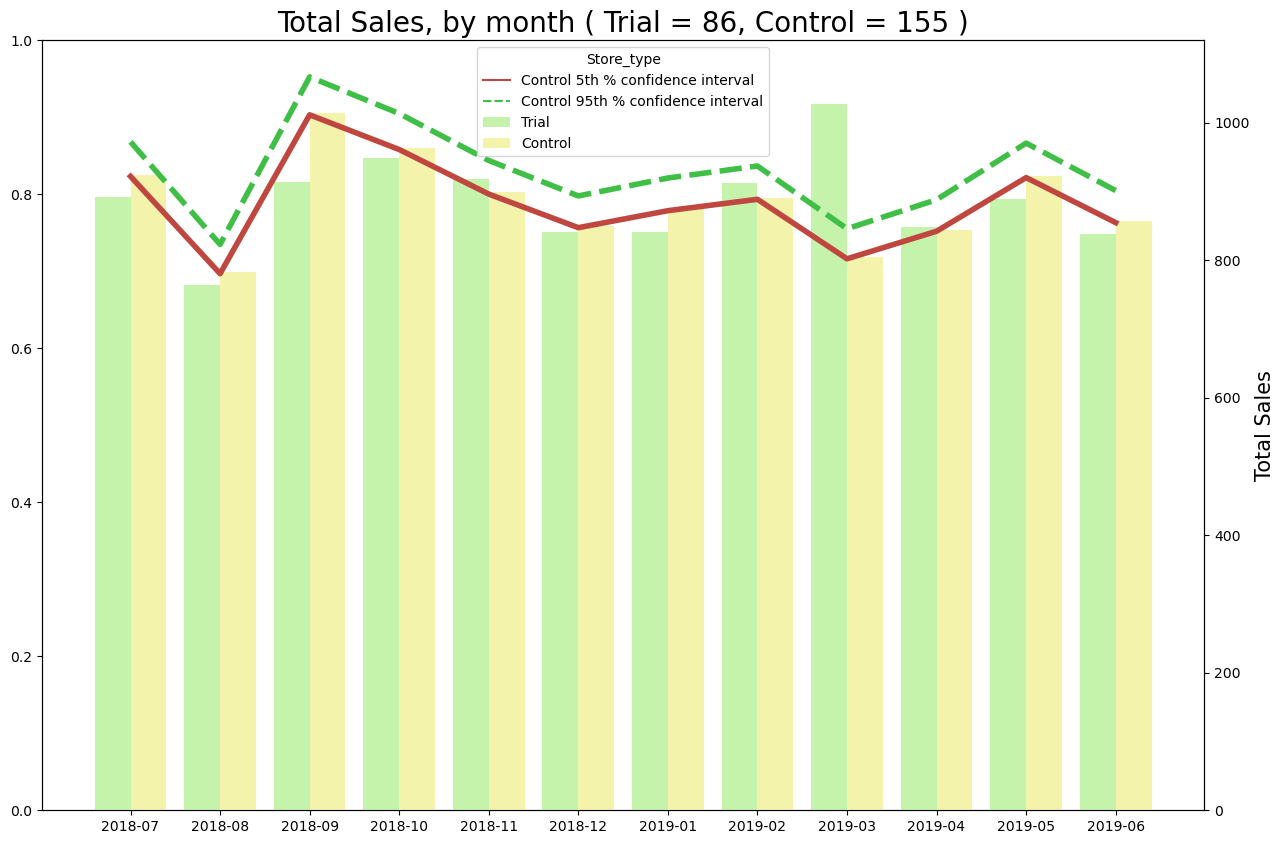

In [71]:
# Plotting
fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
ax2 = ax1.twinx()
ax1 = sns.barplot(x=bar_86_sale.index, y=bar_86_sale["TOT_SALES"], hue=bar_86_sale["Store_type"], data=bar_86_sale,
                 palette=["#C3FFA0", "#FFFFA0"])
ax2 = sns.lineplot(data=line_86_sale, linewidth=4, palette=sns.hls_palette(3, l=.5, s=.5))
plt.title("Total Sales, by month ( Trial = 86, Control = 155 )",fontsize=20)
plt.ylabel("Total Sales", fontsize=15)
plt.xlabel("Month of Operation",fontsize=15)


The findings reveal that the trial conducted at store 86 is not significantly different from its control store during the trial period. This conclusion is drawn because the performance of the trial store falls within the 5% to 95% confidence interval of the control store in two out of the three trial months.

# Number of customers

# Store 77

In [72]:
# Scale pre-trial control customer counts to match pre-trial trial store customer counts
scalingContCust_77 = (preTrial[preTrial["STORE_NBR"] == 77]["CUS_COUNTS"].sum()) / (preTrial[preTrial["STORE_NBR"] == 233]["CUS_COUNTS"].sum())
scalingContCust_77 

1.0033557046979866

In [73]:
# Apply the scaling factor
scaledContCust_77 = metrics[metrics["STORE_NBR"]== 233]
scaledContCust_77["controlCust"] = scaledContCust_77["CUS_COUNTS"] * scalingContCust_77
scaledContCust_77

,STORE_NBR,YEARMONTH,TOT_SALES,CUS_COUNTS,TXN/CUS,CHIP/CUS,AVGPRICE/CHIP,Store_type,TransactionMonth,controlCust
2699,233,201807,290.7,51,1.058824,1.725490,3.303409,Other Stores,2018-07-01,51.171141
2700,233,201808,285.9,48,1.041667,1.666667,3.573750,Other Stores,2018-08-01,48.161074
2701,233,201809,228.6,42,1.071429,1.666667,3.265714,Other Stores,2018-09-01,42.140940
2702,233,201810,185.7,35,1.028571,1.600000,3.316071,Other Stores,2018-10-01,35.117450
2703,233,201811,211.6,40,1.025000,1.550000,3.412903,Other Stores,2018-11-01,40.134228
2704,233,201812,279.8,47,1.063830,1.595745,3.730667,Other Stores,2018-12-01,47.157718
2705,233,201901,177.5,35,1.000000,1.342857,3.776596,Other Stores,2019-01-01,35.117450
2706,233,201902,244.0,45,1.044444,1.555556,3.485714,Other Stores,2019-02-01,45.151007
2707,233,201903,199.1,40,1.025000,1.475000,3.374576,Other Stores,2019-03-01,40.134228
2708,233,201904,158.6,30,1.066667,1.533333,3.447826,Other Stores,2019-04-01,30.100671


In [74]:
# Calculate the percentage difference between scaled control customer counts and trial customer counts
trialCust_77 = metrics[metrics["STORE_NBR"]== 77].reset_index(drop=True)
scaledContCust_77 = scaledContCust_77.reset_index(drop=True)
percentDiff_77_c = pd.concat([trialCust_77["YEARMONTH"],trialCust_77["CUS_COUNTS"],scaledContCust_77["controlCust"]],axis=1)
percentDiff_77_c.columns=["YEARMONTH","trialCust","controlCust"]
percentDiff_77_c["percentDiff"]= (abs(percentDiff_77_c["trialCust"]-percentDiff_77_c["controlCust"]))/percentDiff_77_c["controlCust"]
percentDiff_77_c

,YEARMONTH,trialCust,controlCust,percentDiff
0,201807,51,51.171141,0.003344
1,201808,47,48.161074,0.024108
2,201809,42,42.140940,0.003344
3,201810,37,35.117450,0.053607
4,201811,41,40.134228,0.021572
5,201812,46,47.157718,0.024550
6,201901,35,35.117450,0.003344
7,201902,45,45.151007,0.003344
8,201903,50,40.134228,0.245819
9,201904,47,30.100671,0.561427


In [75]:
# standard deviation of percentage difference in pre-trail period
std_77_cus = percentDiff_77_c[percentDiff_77_c["YEARMONTH"]<201902]["percentDiff"].std()
std_77_cus

0.01824074855824395

In [76]:
# Calculate the t-values for the trial months. 
percentDiff_77_c["tValue"] = (percentDiff_77_c["percentDiff"]-0)/std_77_cus
percentDiff_77_c

,YEARMONTH,trialCust,controlCust,percentDiff,tValue
0,201807,51,51.171141,0.003344,0.183352
1,201808,47,48.161074,0.024108,1.321664
2,201809,42,42.140940,0.003344,0.183352
3,201810,37,35.117450,0.053607,2.938874
4,201811,41,40.134228,0.021572,1.182622
5,201812,46,47.157718,0.024550,1.345883
6,201901,35,35.117450,0.003344,0.183352
7,201902,45,45.151007,0.003344,0.183352
8,201903,50,40.134228,0.245819,13.476388
9,201904,47,30.100671,0.561427,30.778725


In [77]:
# Create new variables Store_type, nCustomers and TransactionMonth in the data table 
# Create a new column "Store_Type"
metricsCust_77 = metrics
pastCust_77 = metricsCust_77
trial_store = 77
control_store = 233
store_type = []
for i in pastCust_77["STORE_NBR"]:
    if i == trial_store:
        store_type.append("Trial")
    elif i == control_store:
        store_type.append("Control")
    else:
        store_type.append("Other Stores")
pastCust_77["Store_type"] = store_type

# Create a new column 'TransactionMonth'
pastCust_77["TransactionMonth"] = pd.to_datetime(pastCust_77["YEARMONTH"], format = "%Y%m")

# select Trial and control store
pastCust_77 = pastCust_77.loc[pastCust_77["Store_type"].isin(["Control","Trial"])]
pastCust_77 = pastCust_77.loc[:,["TransactionMonth", "Store_type","CUS_COUNTS"]]
pastCust_77

,TransactionMonth,Store_type,CUS_COUNTS
880,2018-07-01,Trial,51
881,2018-08-01,Trial,47
882,2018-09-01,Trial,42
883,2018-10-01,Trial,37
884,2018-11-01,Trial,41
885,2018-12-01,Trial,46
886,2019-01-01,Trial,35
887,2019-02-01,Trial,45
888,2019-03-01,Trial,50
889,2019-04-01,Trial,47


In [78]:
# Control store 95th percentile
pastCust_Controls95_77 = pastCust_77[pastCust_77["Store_type"] == "Control"]
pastCust_Controls95_77["CUS_COUNTS"] = pastCust_Controls95_77["CUS_COUNTS"] * (1+(std_77_cus*2))
pastCust_Controls95_77["Store_type"] = "Control 95th % confidence interval"
pastCust_Controls95_77 = pastCust_Controls95_77.loc[:,["TransactionMonth", "Store_type","CUS_COUNTS"]]
pastCust_Controls95_77.head()

,TransactionMonth,Store_type,CUS_COUNTS
2699,2018-07-01,Control 95th % confidence interval,52.860556
2700,2018-08-01,Control 95th % confidence interval,49.751112
2701,2018-09-01,Control 95th % confidence interval,43.532223
2702,2018-10-01,Control 95th % confidence interval,36.276852
2703,2018-11-01,Control 95th % confidence interval,41.459260


In [79]:
# Control store 5th percentile
pastCust_Controls5_77 = pastCust_77[pastCust_77["Store_type"] == "Control"]
pastCust_Controls5_77["CUS_COUNTS"] = pastCust_Controls95_77["CUS_COUNTS"] * (1-(std_77_cus*2))
pastCust_Controls5_77["Store_type"] = "Control 5th % confidence interval"
pastCust_Controls5_77 = pastCust_Controls5_77.loc[:,["TransactionMonth", "Store_type","CUS_COUNTS"]]
pastCust_Controls5_77.head()

,TransactionMonth,Store_type,CUS_COUNTS
2699,2018-07-01,Control 5th % confidence interval,50.932124
2700,2018-08-01,Control 5th % confidence interval,47.936117
2701,2018-09-01,Control 5th % confidence interval,41.944102
2702,2018-10-01,Control 5th % confidence interval,34.953419
2703,2018-11-01,Control 5th % confidence interval,39.946764


In [80]:
# Merge 3 tables above together
trialAssessment_77_cus = pd.concat([pastCust_77, pastCust_Controls95_77, pastCust_Controls5_77])
trialAssessment_77_cus

,TransactionMonth,Store_type,CUS_COUNTS
880,2018-07-01,Trial,51.000000
881,2018-08-01,Trial,47.000000
882,2018-09-01,Trial,42.000000
883,2018-10-01,Trial,37.000000
884,2018-11-01,Trial,41.000000
885,2018-12-01,Trial,46.000000
886,2019-01-01,Trial,35.000000
887,2019-02-01,Trial,45.000000
888,2019-03-01,Trial,50.000000
889,2019-04-01,Trial,47.000000


Text(0, 0.5, 'Customers Count')

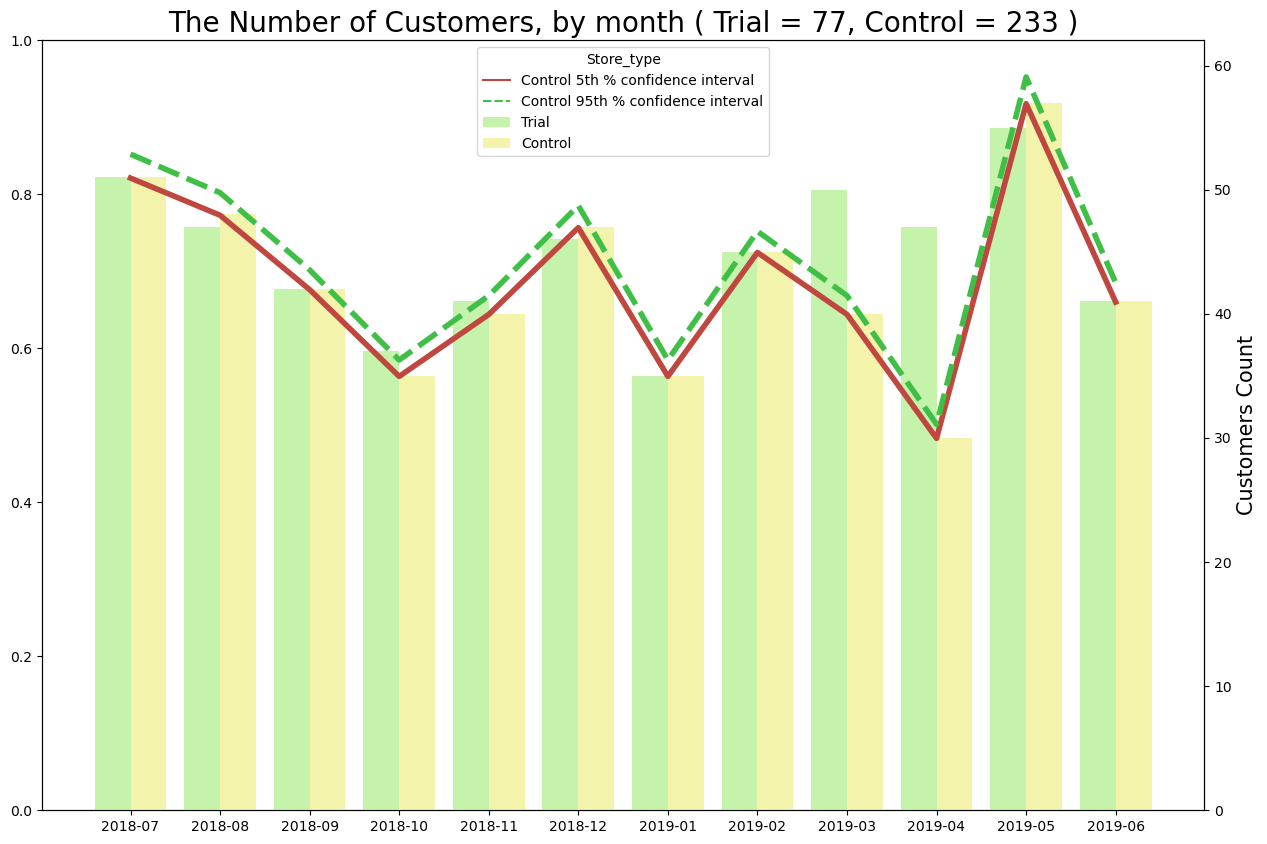

In [81]:
# Plotting in barplot
bar_77_cus = trialAssessment_77_cus
bar_77_cus["TransactionMonth"] = bar_77_cus["TransactionMonth"].dt.strftime("%Y-%m").astype("str")
bar_77_cus = bar_77_cus.set_index("TransactionMonth")
bar_77_cus = bar_77_cus.iloc[:24,:]
#bar_77_cus

# Dataset for lineplot
line_77_cus = trialAssessment_77_cus.set_index(["TransactionMonth","Store_type"])["CUS_COUNTS"].unstack()
line_77_cus = line_77_cus.iloc[:,[1,2]]
line_77_cus

# Plotting
fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
ax2 = ax1.twinx()
ax1 = sns.barplot(x=bar_77_cus.index, y=bar_77_cus["CUS_COUNTS"], hue=bar_77_cus["Store_type"], data=bar_77_cus,
                 palette=["#C3FFA0", "#FFFFA0"])
ax2 = sns.lineplot(data=line_77_cus, linewidth=4, palette=sns.hls_palette(3, l=.5, s=.5))
plt.title("The Number of Customers, by month ( Trial = 77, Control = 233 )",fontsize=20)
plt.xlabel("Month of Operation",fontsize=15)
plt.ylabel("Customers Count", fontsize=15)

It appears that the number of customers in the trial store significantly increased in all three months. This suggests that the trial had a substantial impact on attracting more customers to trial store 86. However, as previously noted, sales were not significantly higher. To gain a deeper understanding of these results, it would be advisable to consult with the Category Manager and inquire about any special deals or pricing strategies implemented in the trial store that may have influenced the outcomes.

# Store 88

In [82]:
# Scale pre-trial control customer counts to match pre-trial trial store customer counts
scalingContCust_88 = (preTrial[preTrial["STORE_NBR"] == 88]["CUS_COUNTS"].sum()) / (preTrial[preTrial["STORE_NBR"] == 237]["CUS_COUNTS"].sum())
scalingContCust_88 

0.9943502824858758

In [83]:
# Apply the scaling factor
scaledContCust_88 = metrics[metrics["STORE_NBR"]== 237]
scaledContCust_88["controlCust"] = scaledContCust_88["CUS_COUNTS"] * scalingContCust_88
scaledContCust_88

,STORE_NBR,YEARMONTH,TOT_SALES,CUS_COUNTS,TXN/CUS,CHIP/CUS,AVGPRICE/CHIP,Store_type,TransactionMonth,controlCust
2747,237,201807,1448.4,128,1.265625,2.531250,4.470370,Other Stores,2018-07-01,127.276836
2748,237,201808,1367.8,135,1.222222,2.318519,4.369968,Other Stores,2018-08-01,134.237288
2749,237,201809,1322.2,126,1.182540,2.373016,4.422074,Other Stores,2018-09-01,125.288136
2750,237,201810,1348.3,123,1.195122,2.430894,4.509365,Other Stores,2018-10-01,122.305085
2751,237,201811,1397.6,132,1.219697,2.424242,4.367500,Other Stores,2018-11-01,131.254237
2752,237,201812,1265.0,124,1.161290,2.330645,4.377163,Other Stores,2018-12-01,123.299435
2753,237,201901,1219.7,117,1.188034,2.367521,4.403249,Other Stores,2019-01-01,116.338983
2754,237,201902,1404.8,126,1.246032,2.492063,4.473885,Other Stores,2019-02-01,125.288136
2755,237,201903,1208.2,119,1.126050,2.302521,4.409489,Other Stores,2019-03-01,118.327684
2756,237,201904,1204.6,120,1.125000,2.266667,4.428676,Other Stores,2019-04-01,119.322034


In [84]:
# Calculate the percentage difference between scaled control customer counts and trial customer counts
trialCust_88 = metrics[metrics["STORE_NBR"]== 88].reset_index(drop=True)
scaledContCust_88 = scaledContCust_88.reset_index(drop=True)
percentDiff_88_c = pd.concat([trialCust_88["YEARMONTH"],trialCust_77["CUS_COUNTS"],scaledContCust_88["controlCust"]],axis=1)
percentDiff_88_c.columns=["YEARMONTH","trialCust","controlCust"]
percentDiff_88_c["percentDiff"]= (abs(percentDiff_88_c["trialCust"]-percentDiff_88_c["controlCust"]))/percentDiff_88_c["controlCust"]
percentDiff_88_c

,YEARMONTH,trialCust,controlCust,percentDiff
0,201807,51,127.276836,0.599299
1,201808,47,134.237288,0.649874
2,201809,42,125.288136,0.664773
3,201810,37,122.305085,0.697478
4,201811,41,131.254237,0.687629
5,201812,46,123.299435,0.626924
6,201901,35,116.338983,0.699155
7,201902,45,125.288136,0.640828
8,201903,50,118.327684,0.577445
9,201904,47,119.322034,0.606108


In [85]:
# standard deviation of percentage difference in pre-trail period
std_88_cus = percentDiff_88_c[percentDiff_88_c["YEARMONTH"]<201902]["percentDiff"].std()
std_88_cus

0.03786219103423942

In [86]:
# Calculate the t-values for the trial months. 
percentDiff_88_c["tValue"] = (percentDiff_88_c["percentDiff"]-0)/std_88_cus
percentDiff_88_c

,YEARMONTH,trialCust,controlCust,percentDiff,tValue
0,201807,51,127.276836,0.599299,15.828420
1,201808,47,134.237288,0.649874,17.164187
2,201809,42,125.288136,0.664773,17.557693
3,201810,37,122.305085,0.697478,18.421486
4,201811,41,131.254237,0.687629,18.161367
5,201812,46,123.299435,0.626924,16.558061
6,201901,35,116.338983,0.699155,18.465783
7,201902,45,125.288136,0.640828,16.925273
8,201903,50,118.327684,0.577445,15.251220
9,201904,47,119.322034,0.606108,16.008264


In [87]:
# Create new variables Store_type, nCustomers and TransactionMonth in the data table 
# Create a new column "Store_Type"
metricsCust_88 = metrics
pastCust_88 = metricsCust_88
trial_store = 88
control_store = 237
store_type = []
for i in pastCust_88["STORE_NBR"]:
    if i == trial_store:
        store_type.append("Trial")
    elif i == control_store:
        store_type.append("Control")
    else:
        store_type.append("Other Stores")
pastCust_88["Store_type"] = store_type

# Create a new column 'TransactionMonth'
pastCust_88["TransactionMonth"] = pd.to_datetime(pastCust_88["YEARMONTH"], format = "%Y%m")

# select Trial and control store
pastCust_88 = pastCust_88.loc[pastCust_88["Store_type"].isin(["Control","Trial"])]
pastCust_88 = pastCust_88.loc[:,["TransactionMonth", "Store_type","CUS_COUNTS"]]
pastCust_88

,TransactionMonth,Store_type,CUS_COUNTS
1001,2018-07-01,Trial,129
1002,2018-08-01,Trial,131
1003,2018-09-01,Trial,124
1004,2018-10-01,Trial,123
1005,2018-11-01,Trial,130
1006,2018-12-01,Trial,126
1007,2019-01-01,Trial,117
1008,2019-02-01,Trial,124
1009,2019-03-01,Trial,134
1010,2019-04-01,Trial,128


In [88]:
# Control store 95th percentile
pastCust_Controls95_88 = pastCust_88[pastCust_88["Store_type"] == "Control"]
pastCust_Controls95_88["CUS_COUNTS"] = pastCust_Controls95_88["CUS_COUNTS"] * (1+(std_88_cus*2))
pastCust_Controls95_88["Store_type"] = "Control 95th % confidence interval"
pastCust_Controls95_88 = pastCust_Controls95_88.loc[:,["TransactionMonth", "Store_type","CUS_COUNTS"]]
pastCust_Controls95_88.head()

,TransactionMonth,Store_type,CUS_COUNTS
2747,2018-07-01,Control 95th % confidence interval,137.692721
2748,2018-08-01,Control 95th % confidence interval,145.222792
2749,2018-09-01,Control 95th % confidence interval,135.541272
2750,2018-10-01,Control 95th % confidence interval,132.314099
2751,2018-11-01,Control 95th % confidence interval,141.995618


In [89]:
# Control store 5th percentile
pastCust_Controls5_88 = pastCust_88[pastCust_88["Store_type"] == "Control"]
pastCust_Controls5_88["CUS_COUNTS"] = pastCust_Controls95_88["CUS_COUNTS"] * (1-(std_88_cus*2))
pastCust_Controls5_88["Store_type"] = "Control 5th % confidence interval"
pastCust_Controls5_88 = pastCust_Controls5_88.loc[:,["TransactionMonth", "Store_type","CUS_COUNTS"]]
pastCust_Controls5_88.head()

,TransactionMonth,Store_type,CUS_COUNTS
2747,2018-07-01,Control 5th % confidence interval,127.266025
2748,2018-08-01,Control 5th % confidence interval,134.225885
2749,2018-09-01,Control 5th % confidence interval,125.277493
2750,2018-10-01,Control 5th % confidence interval,122.294696
2751,2018-11-01,Control 5th % confidence interval,131.243088


In [90]:
# Merge 3 tables above together
trialAssessment_88_cus = pd.concat([pastCust_88, pastCust_Controls95_88, pastCust_Controls5_88])
trialAssessment_88_cus

,TransactionMonth,Store_type,CUS_COUNTS
1001,2018-07-01,Trial,129.000000
1002,2018-08-01,Trial,131.000000
1003,2018-09-01,Trial,124.000000
1004,2018-10-01,Trial,123.000000
1005,2018-11-01,Trial,130.000000
1006,2018-12-01,Trial,126.000000
1007,2019-01-01,Trial,117.000000
1008,2019-02-01,Trial,124.000000
1009,2019-03-01,Trial,134.000000
1010,2019-04-01,Trial,128.000000


Text(0, 0.5, 'Customers Count')

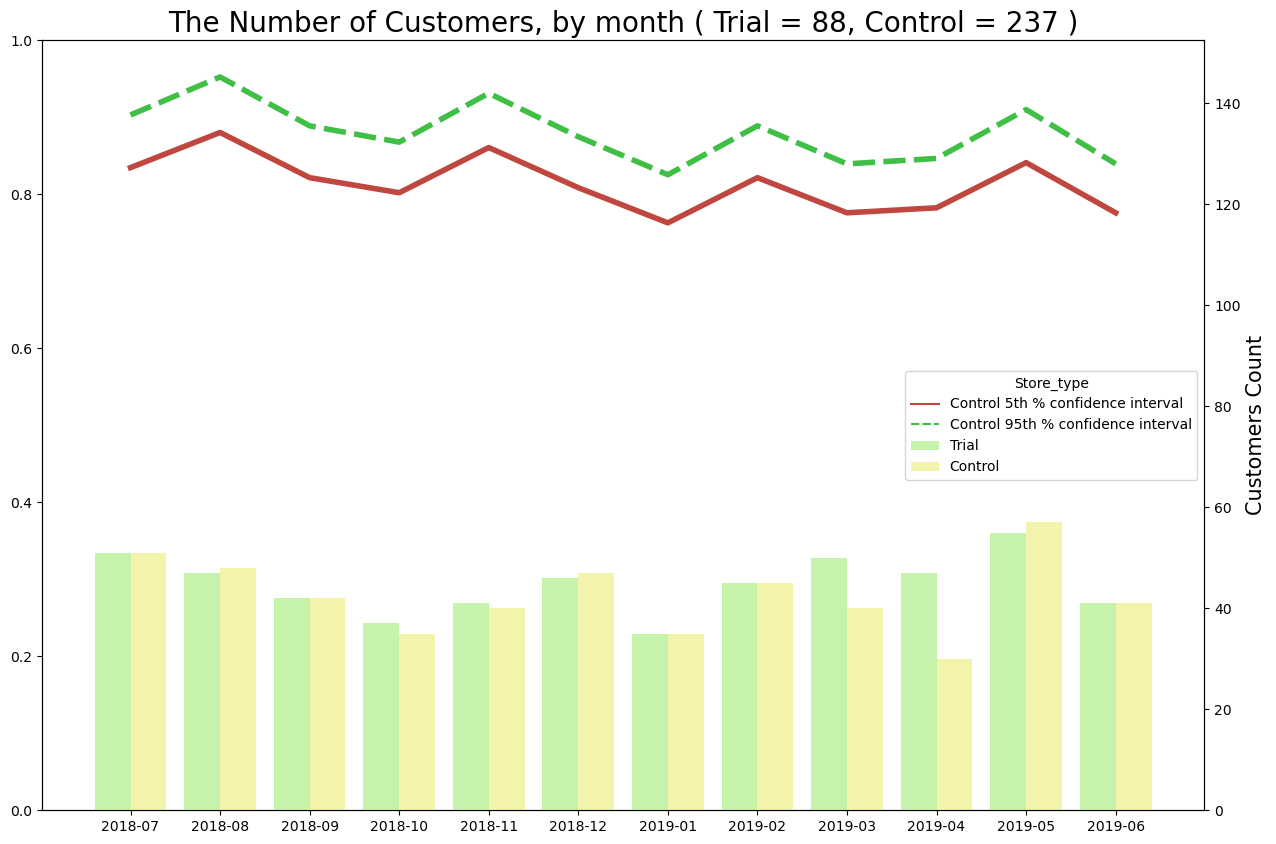

In [91]:
# Plotting in barplot
bar_88_cus = trialAssessment_88_cus
bar_88_cus["TransactionMonth"] = bar_88_cus["TransactionMonth"].dt.strftime("%Y-%m").astype("str")
bar_88_cus = bar_88_cus.set_index("TransactionMonth")
bar_88_cus = bar_88_cus.iloc[:24,:]
#bar_77_cus

# Dataset for lineplot
line_88_cus = trialAssessment_88_cus.set_index(["TransactionMonth","Store_type"])["CUS_COUNTS"].unstack()
line_88_cus = line_88_cus.iloc[:,[1,2]]
line_88_cus

# Plotting
fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
ax2 = ax1.twinx()
ax1 = sns.barplot(x=bar_88_cus.index, y=bar_77_cus["CUS_COUNTS"], hue=bar_88_cus["Store_type"], data=bar_88_cus,
                 palette=["#C3FFA0", "#FFFFA0"])
ax2 = sns.lineplot(data=line_88_cus, linewidth=4, palette=sns.hls_palette(3, l=.5, s=.5))
plt.title("The Number of Customers, by month ( Trial = 88, Control = 237 )",fontsize=20)
plt.xlabel("Month of Operation",fontsize=15)
plt.ylabel("Customers Count", fontsize=15)

During the trial period, the total number of customers in the trial store is notably higher than that in the control store for two out of the three months. This observation suggests a positive trial effect, signifying an increase in customer engagement and interest during the trial.

# Store 86

In [92]:
# Scale pre-trial control customer counts to match pre-trial trial store customer counts
scalingContCust_86 = (preTrial[preTrial["STORE_NBR"] == 86]["CUS_COUNTS"].sum()) / (preTrial[preTrial["STORE_NBR"] == 155]["CUS_COUNTS"].sum())
scalingContCust_86 

1.0

In [93]:
# Apply the scaling factor
scaledContCust_86 = metrics[metrics["STORE_NBR"]== 155]
scaledContCust_86["controlCust"] = scaledContCust_86["CUS_COUNTS"] * scalingContCust_86
scaledContCust_86

,STORE_NBR,YEARMONTH,TOT_SALES,CUS_COUNTS,TXN/CUS,CHIP/CUS,AVGPRICE/CHIP,Store_type,TransactionMonth,controlCust
1793,155,201807,924.60,101,1.217822,2.475248,3.698400,Other Stores,2018-07-01,101.0
1794,155,201808,782.70,91,1.307692,2.516484,3.417904,Other Stores,2018-08-01,91.0
1795,155,201809,1014.40,103,1.398058,2.815534,3.497931,Other Stores,2018-09-01,103.0
1796,155,201810,963.80,108,1.259259,2.518519,3.543382,Other Stores,2018-10-01,108.0
1797,155,201811,898.80,101,1.316832,2.673267,3.328889,Other Stores,2018-11-01,101.0
1798,155,201812,849.80,97,1.237113,2.494845,3.511570,Other Stores,2018-12-01,97.0
1799,155,201901,874.60,96,1.302083,2.625000,3.470635,Other Stores,2019-01-01,96.0
1800,155,201902,891.20,95,1.315789,2.673684,3.508661,Other Stores,2019-02-01,95.0
1801,155,201903,804.40,94,1.255319,2.553191,3.351667,Other Stores,2019-03-01,94.0
1802,155,201904,844.60,99,1.212121,2.444444,3.490083,Other Stores,2019-04-01,99.0


In [94]:
# Calculate the percentage difference between scaled control customer counts and trial customer counts
trialCust_86 = metrics[metrics["STORE_NBR"]== 86].reset_index(drop=True)
scaledContCust_86 = scaledContCust_86.reset_index(drop=True)
percentDiff_86_c = pd.concat([trialCust_86["YEARMONTH"],trialCust_86["CUS_COUNTS"],scaledContCust_86["controlCust"]],axis=1)
percentDiff_86_c.columns=["YEARMONTH","trialCust","controlCust"]
percentDiff_86_c["percentDiff"]= (abs(percentDiff_86_c["trialCust"]-percentDiff_86_c["controlCust"]))/percentDiff_86_c["controlCust"]
percentDiff_86_c

,YEARMONTH,trialCust,controlCust,percentDiff
0,201807,99,101.0,0.019802
1,201808,94,91.0,0.032967
2,201809,103,103.0,0.000000
3,201810,109,108.0,0.009259
4,201811,100,101.0,0.009901
5,201812,98,97.0,0.010309
6,201901,94,96.0,0.020833
7,201902,107,95.0,0.126316
8,201903,115,94.0,0.223404
9,201904,105,99.0,0.060606


In [95]:
# standard deviation of percentage difference in pre-trail period
std_86_cus = percentDiff_86_c[percentDiff_86_c["YEARMONTH"]<201902]["percentDiff"].std()
std_86_cus

0.010687444701395238

In [96]:
# Calculate the t-values for the trial months. 
percentDiff_86_c["tValue"] = (percentDiff_86_c["percentDiff"]-0)/std_86_cus
percentDiff_86_c

,YEARMONTH,trialCust,controlCust,percentDiff,tValue
0,201807,99,101.0,0.019802,1.852826
1,201808,94,91.0,0.032967,3.084651
2,201809,103,103.0,0.000000,0.000000
3,201810,109,108.0,0.009259,0.866368
4,201811,100,101.0,0.009901,0.926413
5,201812,98,97.0,0.010309,0.964616
6,201901,94,96.0,0.020833,1.949328
7,201902,107,95.0,0.126316,11.819082
8,201903,115,94.0,0.223404,20.903430
9,201904,105,99.0,0.060606,5.670772


In [97]:
# Create new variables Store_type, nCustomers and TransactionMonth in the data table 
# Create a new column "Store_Type"
metricsCust_86 = metrics
pastCust_86 = metricsCust_86
trial_store = 86
control_store = 155
store_type = []
for i in pastCust_86["STORE_NBR"]:
    if i == trial_store:
        store_type.append("Trial")
    elif i == control_store:
        store_type.append("Control")
    else:
        store_type.append("Other Stores")
pastCust_86["Store_type"] = store_type

# Create a new column 'TransactionMonth'
pastCust_86["TransactionMonth"] = pd.to_datetime(pastCust_86["YEARMONTH"], format = "%Y%m")

# select Trial and control store
pastCust_86 = pastCust_86.loc[pastCust_86["Store_type"].isin(["Control","Trial"])]
pastCust_86 = pastCust_86.loc[:,["TransactionMonth", "Store_type","CUS_COUNTS"]]
pastCust_86

,TransactionMonth,Store_type,CUS_COUNTS
977,2018-07-01,Trial,99
978,2018-08-01,Trial,94
979,2018-09-01,Trial,103
980,2018-10-01,Trial,109
981,2018-11-01,Trial,100
982,2018-12-01,Trial,98
983,2019-01-01,Trial,94
984,2019-02-01,Trial,107
985,2019-03-01,Trial,115
986,2019-04-01,Trial,105


In [98]:
# Control store 95th percentile
pastCust_Controls95_86 = pastCust_86[pastCust_86["Store_type"] == "Control"]
pastCust_Controls95_86["CUS_COUNTS"] = pastCust_Controls95_86["CUS_COUNTS"] * (1+(std_86_cus*2))
pastCust_Controls95_86["Store_type"] = "Control 95th % confidence interval"
pastCust_Controls95_86 = pastCust_Controls95_86.loc[:,["TransactionMonth", "Store_type","CUS_COUNTS"]]
pastCust_Controls95_86.head()

,TransactionMonth,Store_type,CUS_COUNTS
1793,2018-07-01,Control 95th % confidence interval,103.158864
1794,2018-08-01,Control 95th % confidence interval,92.945115
1795,2018-09-01,Control 95th % confidence interval,105.201614
1796,2018-10-01,Control 95th % confidence interval,110.308488
1797,2018-11-01,Control 95th % confidence interval,103.158864


In [99]:
# Control store 5th percentile
pastCust_Controls5_86 = pastCust_86[pastCust_86["Store_type"] == "Control"]
pastCust_Controls5_86["CUS_COUNTS"] = pastCust_Controls95_86["CUS_COUNTS"] * (1-(std_86_cus*2))
pastCust_Controls5_86["Store_type"] = "Control 5th % confidence interval"
pastCust_Controls5_86 = pastCust_Controls5_86.loc[:,["TransactionMonth", "Store_type","CUS_COUNTS"]]
pastCust_Controls5_86.head()

,TransactionMonth,Store_type,CUS_COUNTS
1793,2018-07-01,Control 5th % confidence interval,100.953855
1794,2018-08-01,Control 5th % confidence interval,90.958423
1795,2018-09-01,Control 5th % confidence interval,102.952941
1796,2018-10-01,Control 5th % confidence interval,107.950656
1797,2018-11-01,Control 5th % confidence interval,100.953855


In [100]:
# Merge 3 tables above together
trialAssessment_86_cus = pd.concat([pastCust_86, pastCust_Controls95_86, pastCust_Controls5_86])
trialAssessment_86_cus

,TransactionMonth,Store_type,CUS_COUNTS
977,2018-07-01,Trial,99.000000
978,2018-08-01,Trial,94.000000
979,2018-09-01,Trial,103.000000
980,2018-10-01,Trial,109.000000
981,2018-11-01,Trial,100.000000
982,2018-12-01,Trial,98.000000
983,2019-01-01,Trial,94.000000
984,2019-02-01,Trial,107.000000
985,2019-03-01,Trial,115.000000
986,2019-04-01,Trial,105.000000


Text(0, 0.5, 'Customers Count')

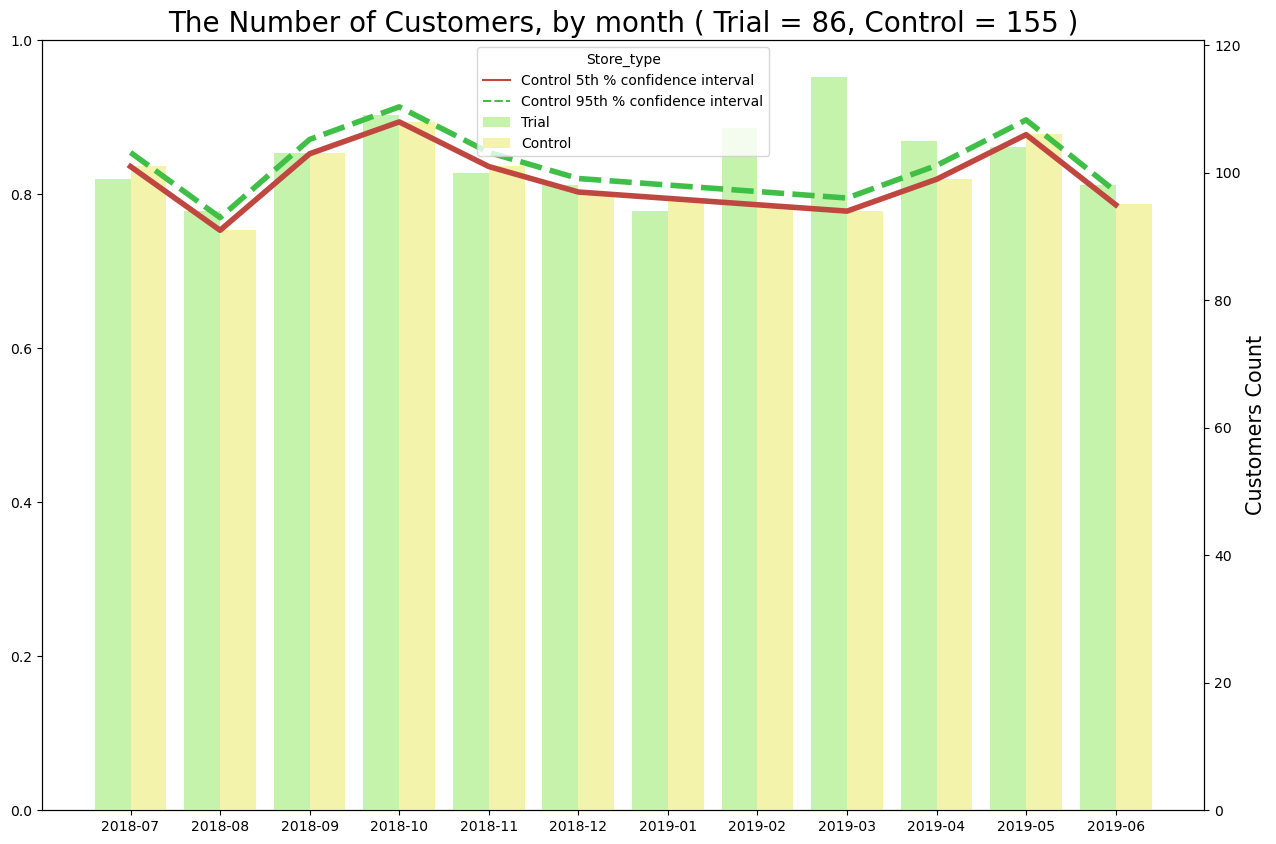

In [101]:
# Plotting in barplot
bar_86_cus = trialAssessment_86_cus
bar_86_cus["TransactionMonth"] = bar_86_cus["TransactionMonth"].dt.strftime("%Y-%m").astype("str")
bar_86_cus = bar_86_cus.set_index("TransactionMonth")
bar_86_cus = bar_86_cus.iloc[:24,:]
#bar_86_cus

# Dataset for lineplot
line_86_cus = trialAssessment_86_cus.set_index(["TransactionMonth","Store_type"])["CUS_COUNTS"].unstack()
line_86_cus = line_86_cus.iloc[:,[1,2]]
line_86_cus

# Plotting
fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
ax2 = ax1.twinx()
ax1 = sns.barplot(x=bar_86_cus.index, y=bar_86_cus["CUS_COUNTS"], hue=bar_86_cus["Store_type"], data=bar_77_cus,
                 palette=["#C3FFA0", "#FFFFA0"])
ax2 = sns.lineplot(data=line_86_cus, linewidth=4, palette=sns.hls_palette(3, l=.5, s=.5))
plt.title("The Number of Customers, by month ( Trial = 86, Control = 155 )",fontsize=20)
plt.xlabel("Month of Operation",fontsize=15)
plt.ylabel("Customers Count", fontsize=15)

## Concusion

*We've successfully identified control stores 233, 155, and 237 to pair with trial stores 77, 86, and 88, respectively. Our analysis reveals compelling results: for trial stores 77 and 88, there is a substantial and statistically significant difference in sales during at least two of the three trial months. However, trial store 86 does not exhibit the same level of difference, potentially due to variations in trial implementation.

*To ensure a comprehensive understanding, we may consult with the client to investigate any differences in the trial's execution at store 86. Overall, our analysis wrongly demonstrates a noteworthy increase in sales during the trial period.

*With our analysis complete, we are ready to prepare our presentation for the Category Manager, providing valuable insights and actionable recommendations.